<a href="https://colab.research.google.com/github/felipeisj/info274-2021/blob/main/Actividad_2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.special import factorial
import pandas as pd
import matplotlib.pyplot as plt
from math import e
import pymc3 as pm
import theano.tensor as T
import graphviz
import arviz as az
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [ ]:
url = 'https://raw.githubusercontent.com/felipeisj/info274-2021/main/billonarios.csv?token=AGNHGUSSHZFLOUVJ546BNCLBAHWJK'
datos = pd.read_csv(url)
datos

pais  nbillonarios   logpibpc     logpob  gatt
0            United States           469  10.786021  19.532846    60
1                   Canada            25  10.743365  17.319439     0
2             Bahamas, The             0  10.072139  12.760934     0
3                    Aruba             0  10.223734  11.526276     0
4                  Bermuda             0  11.446847  11.086334     0
..                     ...           ...        ...        ...   ...
192  Micronesia, Fed. Sts.             0   7.824408  11.556923     0
193                  Samoa             0   8.124372  12.119665    15
194   Hong Kong SAR, China            26  10.356964  15.755374    22
195            Puerto Rico             0  10.122557  15.140160    60
196     West Bank and Gaza             0   7.525887  15.095524     0

[197 rows x 5 columns]

In [ ]:
x = datos[['logpibpc', 'logpob', 'gatt']].to_numpy()
y = datos[['nbillonarios']].to_numpy()

#Definición del modelo


In [ ]:
with pm.Model() as funcion_poisson:

    # define priors, weakly informative Normal
    b0 = pm.Normal('theta0', mu=0, sd=5, shape=())
    b1 = pm.Normal("logpibpc", mu=0, sd=5, shape=())
    b2 = pm.Normal("logpob", mu=0, sd=5, shape=())
    b3 = pm.Normal("gatt", mu=0, sd=5, shape=())

    # define linear model and exp link function
    theta = (
        b0
        + b1 * datos["logpibpc"]
        + b2 * datos["logpob"]
        + b3 * datos["gatt"]
    )
    
    #Variable Determinista
    mu = pm.Deterministic("mu", theta)
    
    ## Verosimilitud de Poisson
    poiss = pm.Poisson("poiss", mu=np.exp(mu), observed=y.T[0])

# Despliegue de forma del modelo

In [ ]:
funcion_poisson

[theta0 ~ Normal, logpibpc ~ Normal, logpob ~ Normal, gatt ~ Normal]

[mu ~ Deterministic]

[poiss ~ Poisson]

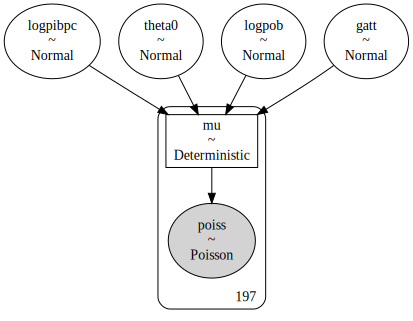

In [ ]:
# Printea los Priors
display(funcion_poisson.free_RVs)
# Printea variable determinista
display(funcion_poisson.deterministics)
# Printea variable observada
display(funcion_poisson.observed_RVs)
pm.model_to_graphviz(funcion_poisson)

In [ ]:
with funcion_poisson:
  prior_checks = pm.sample_prior_predictive(samples = 100, var_names = ['theta0', 'logpibpc', 'logpob', 'gatt'])

In [ ]:
(prior_checks['logpibpc'])

array([  2.06836623,   2.20428802,  -3.38697471,  -7.15121788,
        10.24401891,   8.47951805,  18.17360101,  -7.81338197,
        -3.0396662 ,  -0.94420971,  -5.92370415,   0.95035159,
         1.30621278,   3.74531933,   6.03184234,  -4.45714427,
        -6.29876798,   6.50179498,   0.54616899,   3.87160761,
        -3.42021582,  -3.40037931,  -2.63207531,   1.52378315,
         6.3108358 ,   2.79188224,  -0.16018871,   5.83976903,
       -10.08109157,   3.3861388 ,   5.28617537,   9.73412763,
        -5.08871841,   1.36606235,   5.86600749,  -5.10792648,
        -1.22995322,  -2.41219687,   2.0984296 ,   3.93830688,
         1.9208592 ,  -1.4461028 ,   6.67770533,  -3.52228418,
         2.40611823,   0.70053366,   2.55158459,  -4.4977983 ,
        -2.19898205, -10.27462836,   0.81813822,   2.37193125,
        -3.54413207,   0.40530284,  -9.79184274,   5.96091619,
        -6.63725309,  -0.03812724,  -2.91080354,  -5.54548085,
        -1.77954129,  -0.35259229,   0.1434564 ,   0.35

# 1) Entrenamiento con NUTS
### Se muestran 6 trazas diferentes con el fin de mostrar el proceso de ajuste de los hiperparámetros hasta encontrar algúna configuración óptima. Las características de cada traza son:
##### trace_0: draws=5000, tune = 1000, chains=4, cores=4
##### trace_1: draws=3000, tune = 500, chains=4, cores=4
##### trace_2: draws=2000, tune = 100, chains=2, cores=4
##### trace_3: draws=500, tune = 100, chains=4, cores=4
##### trace_4: draws=500, tune = 100, chains=2, cores=4
##### trace_5: draws=100, tune = 10, chains=2, cores=4

In [ ]:
with funcion_poisson:
  trace_0 = pm.sample(draws=5000, tune = 1000, chains=4, cores=4, step=pm.NUTS())
  trace_1 = pm.sample(draws=3000, tune = 500, chains =4, cores=4, step=pm.NUTS())
  trace_2 = pm.sample(draws=2000, tune = 100, chains=2, cores=4, step=pm.NUTS())
  trace_3 = pm.sample(draws=500, tune = 100, chains=4, cores=4, step=pm.NUTS())
  trace_4 = pm.sample(draws=500, tune = 100, chains=2, cores=4, step=pm.NUTS())
  trace_5 = pm.sample(draws=100, tune = 10, chains=2, cores=4, step=pm.NUTS())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gatt, logpob, logpibpc, theta0]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 188 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gatt, logpob, logpibpc, theta0]


Sampling 4 chains for 500 tune and 3_000 draw iterations (2_000 + 12_000 draws total) took 132 seconds.
The acceptance probability does not match the target. It is 0.8951428877589426, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9198062957952585, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9154174871057331, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9107636852918809, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=T

Sampling 2 chains for 100 tune and 2_000 draw iterations (200 + 4_000 draws total) took 40 seconds.
The acceptance probability does not match the target. It is 0.9155673614643954, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8834417150188107, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  """
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gatt, logpob, logpibpc, theta0]


Sampling 4 chains for 100 tune and 500 draw iterations (400 + 2_000 draws total) took 51 seconds.
The acceptance probability does not match the target. It is 0.9339665231087476, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9201225085031913, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9362324439562396, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.923588465669856, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In v4.0, pm.sample will r

Sampling 2 chains for 100 tune and 500 draw iterations (200 + 1_000 draws total) took 10 seconds.
The acceptance probability does not match the target. It is 0.9128349643448151, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Only 100 samples in chain.
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [gatt, logpob, logpibpc, theta0]


Sampling 2 chains for 10 tune and 100 draw iterations (20 + 200 draws total) took 3 seconds.
The acceptance probability does not match the target. It is 0.9484228714912101, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


## 1.1. Gráficos para cada traza

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


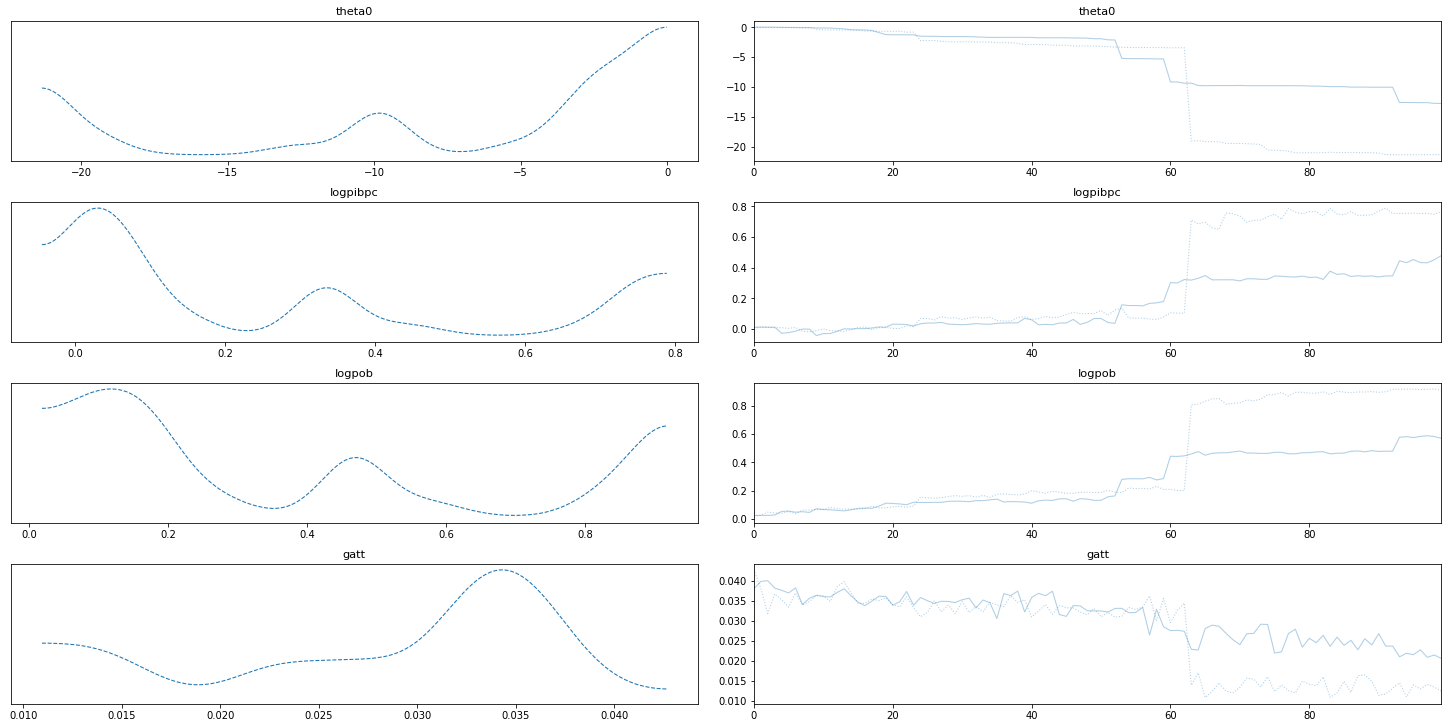

In [ ]:
# Trace_5
pm.traceplot(trace_5, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'], combined=True);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


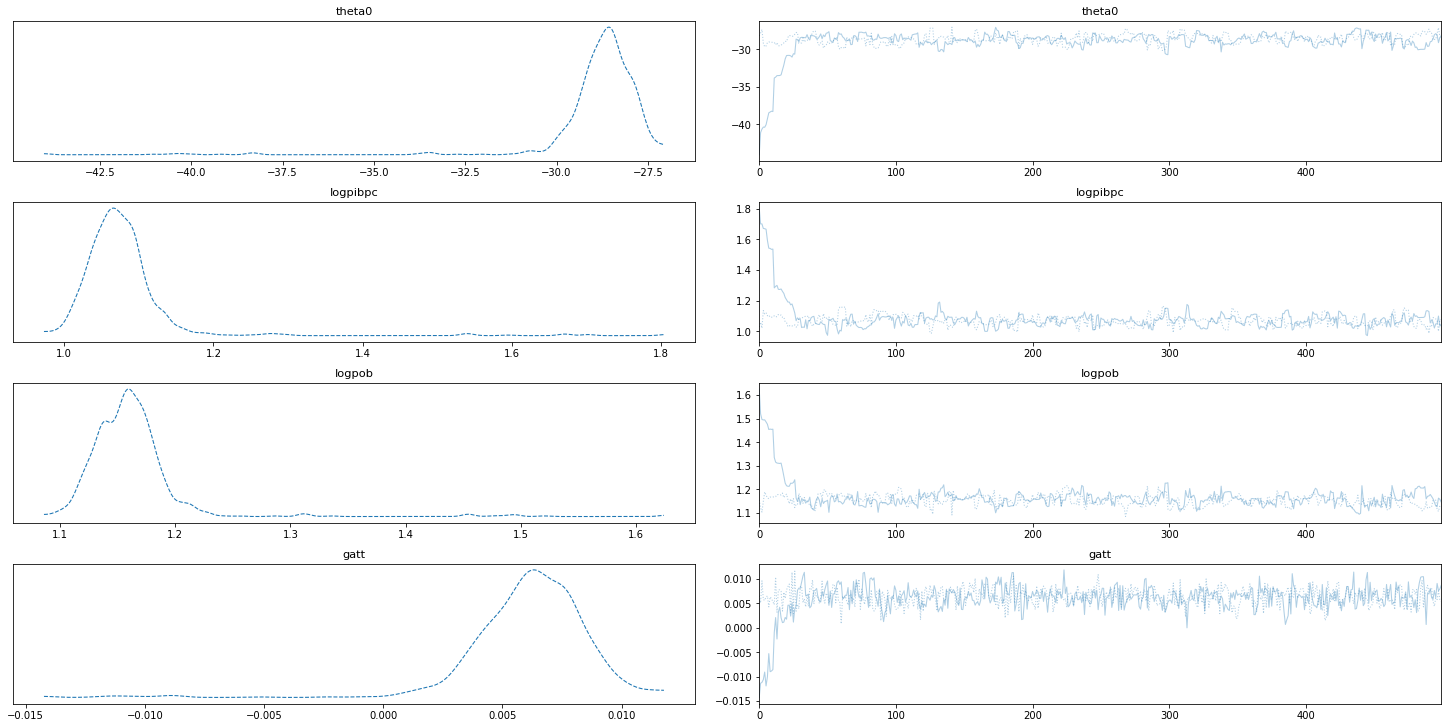

In [ ]:
# Trace_4
pm.traceplot(trace_4, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'], combined=True);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


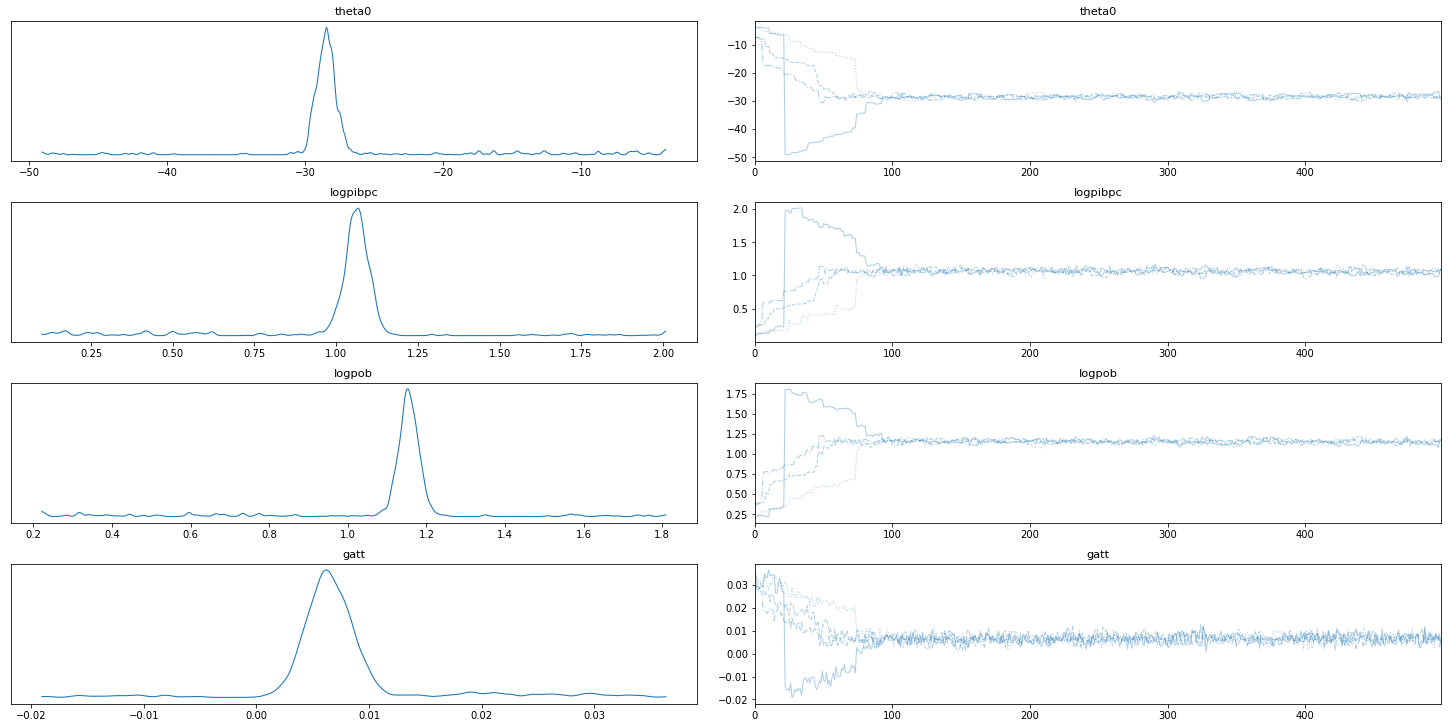

In [ ]:
# Trace_3
pm.traceplot(trace_3, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'], combined=True);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


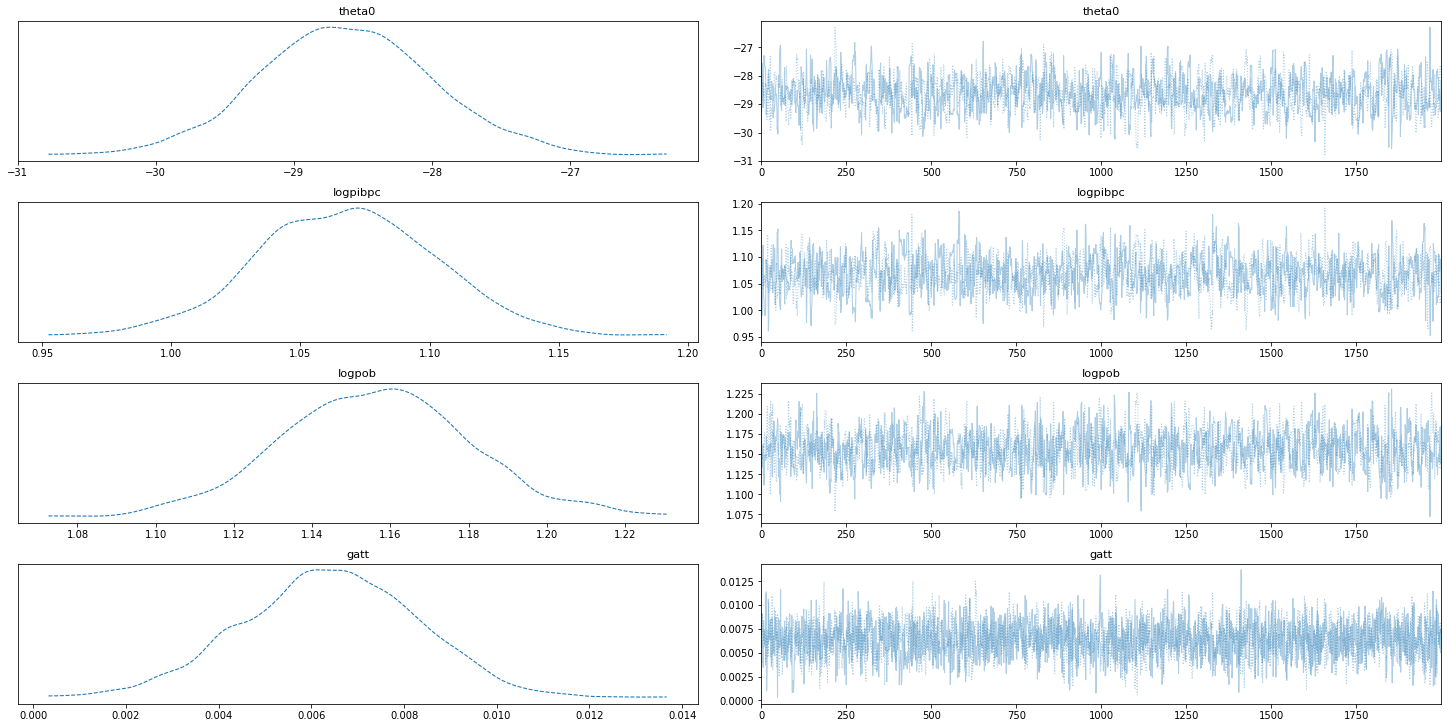

In [ ]:
# Trace_2
pm.traceplot(trace_2, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'], combined=True);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


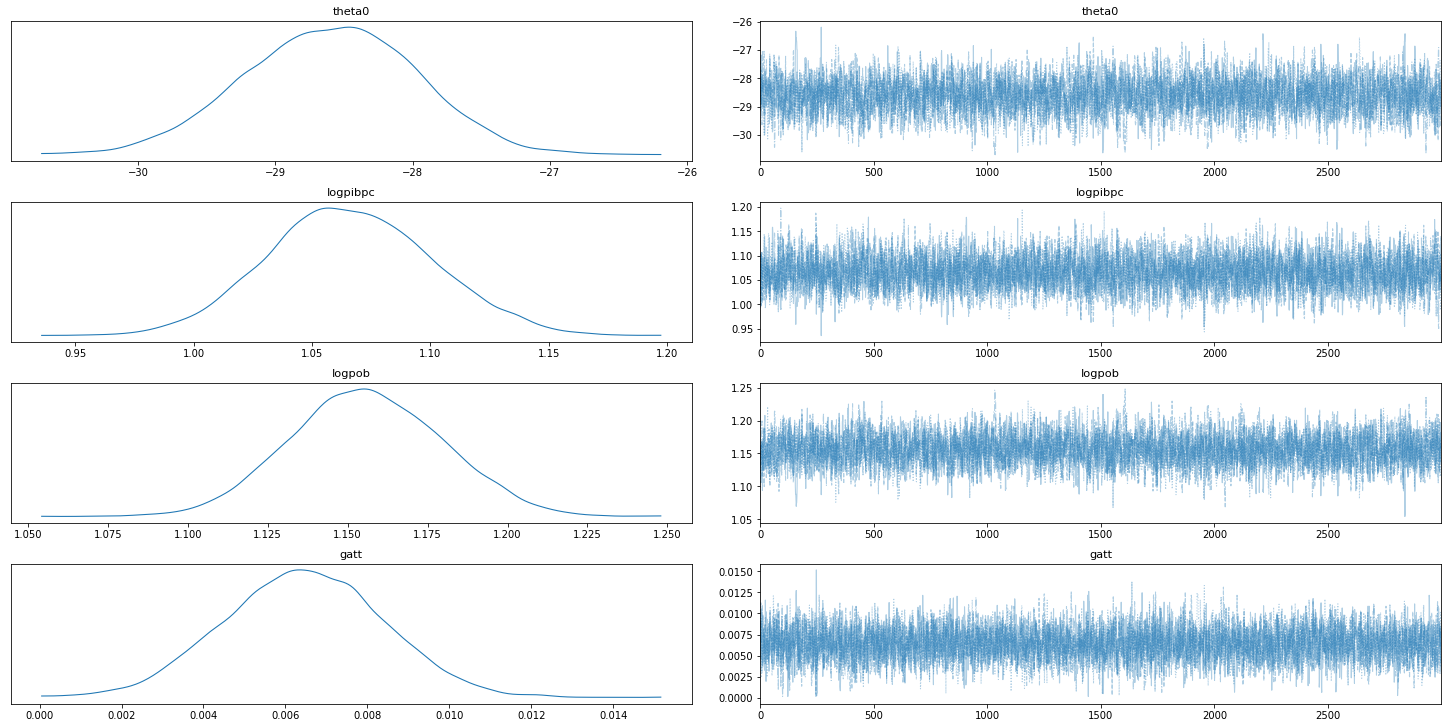

In [ ]:
# Trace_1
pm.traceplot(trace_1, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'], combined=True);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


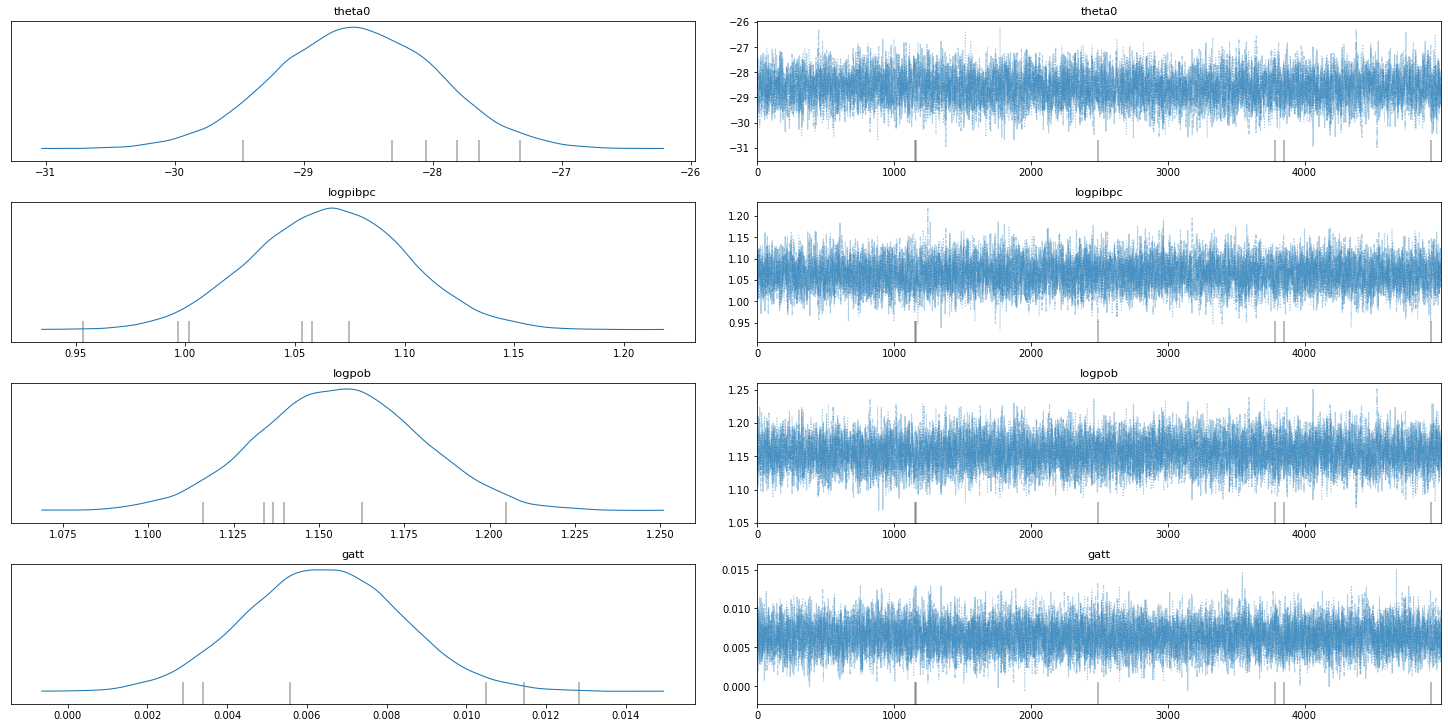

In [ ]:
# Trace_0
pm.traceplot(trace_0, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'], combined=True);

### Análisis de la evolución de las trazas

Como podemos observar en los graficos de las trazas de la 5 hasta la 0, hay una notable evolución respecto a la forma de ruido blanco y calidad de las mismas. Primero que todo, la baja calidad de la traza que se muestra en el gráfico de la traza 5, deja en evidencia el bajo numero de muestras a dibujar (draws), se propuso establecer un numero de muestras obviadas (tune), para reducir el numero de fallos iniciales, pero al ser tan pocos draws, no tiene mucho efecto. Sin embargo en los gráficos de las trazas 4 y 3, aumentamos el numero de draws, para que pueda entrenar de mejor manera, pero se puede ver como toma en cuenta datos que no estan muy cercanos a la distribución óptima de la traza. Es aca donde se toma la decisión de aumentar los parámetros **tune** y **draws**, lo que significó una considerable mejora en la traza 2, aplicando 4 cadenas. Se quizo seguir probando cual era la mejor configuración, y notamos una mejora al subir la cantidad de samples a 3000, lo cual nos llevó a establecer la cantidad final de draws en 5000, dejando las cadenas en 4 y un tune de 1000, siendo esta la mejor configuración de hiperparámetros encontrada (trace_0)

## 1.2. Sumary de cada traza


In [ ]:
# trace_5
pm.summary(trace_5, var_names=['theta0', 'logpibpc', 'logpob', 'gatt']).round(3)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
theta0   -6.963  7.397 -21.024    0.009  ...    3.436       3.0      12.0   1.95
logpibpc  0.235  0.274  -0.016    0.767  ...    0.126       3.0      20.0   1.86
logpob    0.340  0.298   0.048    0.918  ...    0.139       3.0      12.0   1.93
gatt      0.029  0.008   0.012    0.038  ...    0.004       3.0      17.0   1.74

[4 rows x 9 columns]

In [ ]:
# trace_4
pm.summary(trace_4, var_names=['theta0', 'logpibpc', 'logpob', 'gatt']).round(3)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
theta0   -28.815  1.415 -30.028  -27.410  ...    0.156     105.0      44.0   1.03
logpibpc   1.078  0.071   1.001    1.139  ...    0.007     142.0      64.0   1.01
logpob     1.162  0.044   1.107    1.206  ...    0.005     104.0      46.0   1.03
gatt       0.006  0.003   0.003    0.010  ...    0.000     245.0     104.0   1.00

[4 rows x 9 columns]

In [ ]:
# trace_3
pm.summary(trace_3, var_names=['theta0', 'logpibpc', 'logpob', 'gatt']).round(3)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
theta0   -27.500  5.758 -31.269   -8.727  ...    0.780      67.0      28.0   1.08
logpibpc   1.023  0.236   0.262    1.168  ...    0.033      66.0      29.0   1.06
logpob     1.115  0.204   0.417    1.251  ...    0.027      70.0      27.0   1.07
gatt       0.008  0.006   0.002    0.027  ...    0.001      71.0      36.0   1.04

[4 rows x 9 columns]

In [ ]:
# trace_2
pm.summary(trace_2, var_names=['theta0', 'logpibpc', 'logpob', 'gatt']).round(3)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
theta0   -28.621  0.619 -29.873  -27.508  ...    0.014     954.0    1124.0    1.0
logpibpc   1.068  0.034   1.003    1.133  ...    0.001     953.0    1192.0    1.0
logpob     1.156  0.024   1.105    1.198  ...    0.001    1121.0    1433.0    1.0
gatt       0.006  0.002   0.003    0.010  ...    0.000    1972.0    2376.0    1.0

[4 rows x 9 columns]

In [ ]:
# trace_1
pm.summary(trace_1, var_names=['theta0', 'logpibpc', 'logpob', 'gatt']).round(3)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
theta0   -28.600  0.626 -29.755  -27.425  ...    0.008    2993.0    4384.0    1.0
logpibpc   1.066  0.035   1.004    1.134  ...    0.000    3691.0    5252.0    1.0
logpob     1.156  0.024   1.113    1.201  ...    0.000    3443.0    4764.0    1.0
gatt       0.006  0.002   0.003    0.010  ...    0.000    4710.0    6093.0    1.0

[4 rows x 9 columns]

In [ ]:
# trace_0
pm.summary(trace_0, var_names=['theta0', 'logpibpc', 'logpob', 'gatt']).round(3)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
theta0   -28.599  0.621 -29.756  -27.427  ...    0.006    4937.0    7725.0    1.0
logpibpc   1.066  0.035   1.000    1.131  ...    0.000    5378.0    7165.0    1.0
logpob     1.156  0.024   1.113    1.201  ...    0.000    6303.0    8792.0    1.0
gatt       0.006  0.002   0.003    0.010  ...    0.000    6506.0    8134.0    1.0

[4 rows x 9 columns]

### Análisis de summary para cada traza

Al observar las métricas, podemos evidenciar la mejora de entrenamiento al ajustar los hiperparámetros del sample. En primera instancia, como se indica en el punto anterior, el entrenamiento es bastante deficiente en trace_5, evidenciando solo 3 muestras efectivas, de un total de 2200, lo que es sumamente bajo, y un coeficiente de Gelman-Rubin(G-R) entre 1.74 y 1.95, lo que indica que las cadenas no se han mezclado bien. Luego, al momento de incrementar los draws, y aumentar a un total de 100 muestras obviadas, el entrenamiento aumenta la calidad, logrando un total de muestras efectivas entre 105 y 245, de un total de 1200, y un coficiente de G-R entre 1.00 y 1.03, resultados que, si bien suponen una considerable mejora, aún estan lejos de ser óptima.
Es así como llegamos a las mejores métricas encontradas para este caso en las trazas 2, 1 y 0, las cuales en su punto más optimo (trace_0), encontramos un numero de muestras efectivo que van desde 4937 hasta 6506, lo que nos da un resultado de entre el ~20% y el ~27% de muestras efectivas respecto al total de 24000, acompañado de un coeficiente de Gelman-Rubin de 1.0 para todos los priors.

## 1.3. Gráficos de atuocorrelación

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6354892a90>,
      dtype=object)

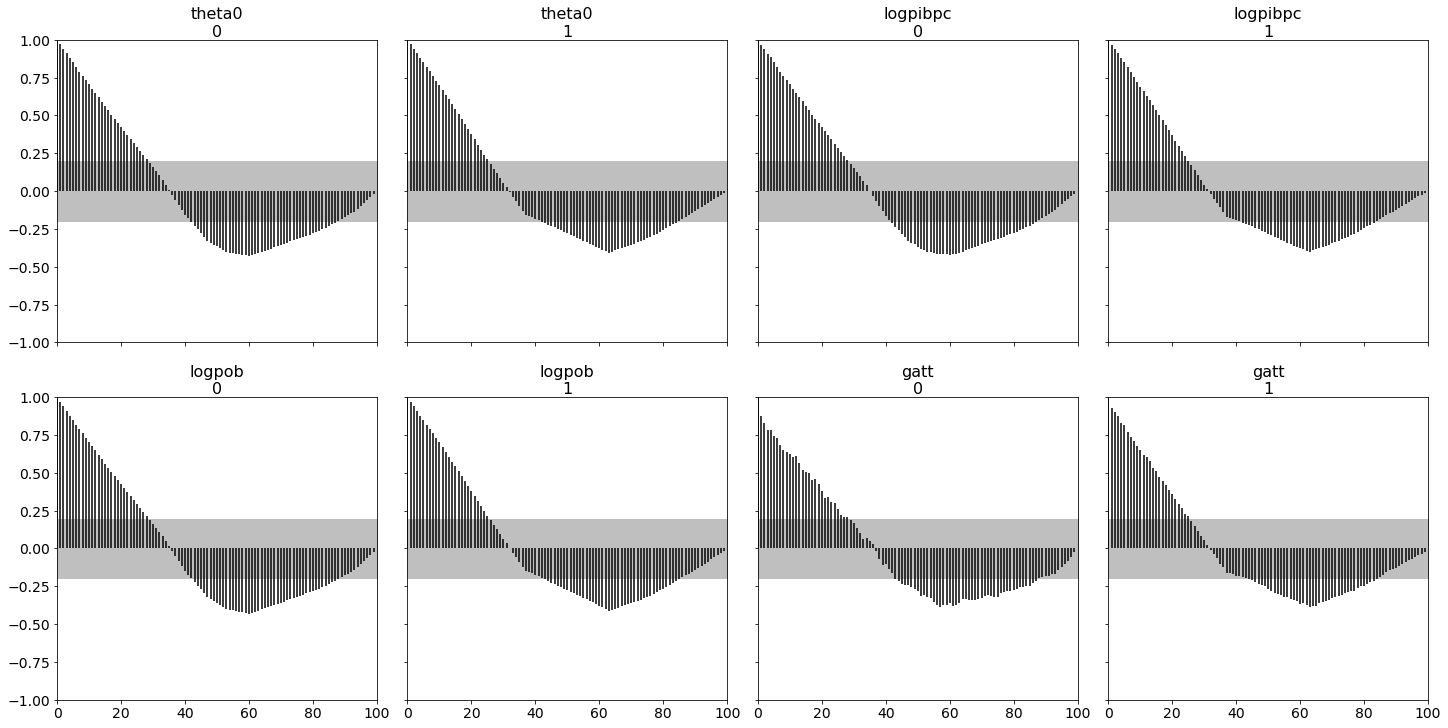

In [ ]:
pm.plots.autocorrplot(trace_5, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6348b1ff50>,
      dtype=object)

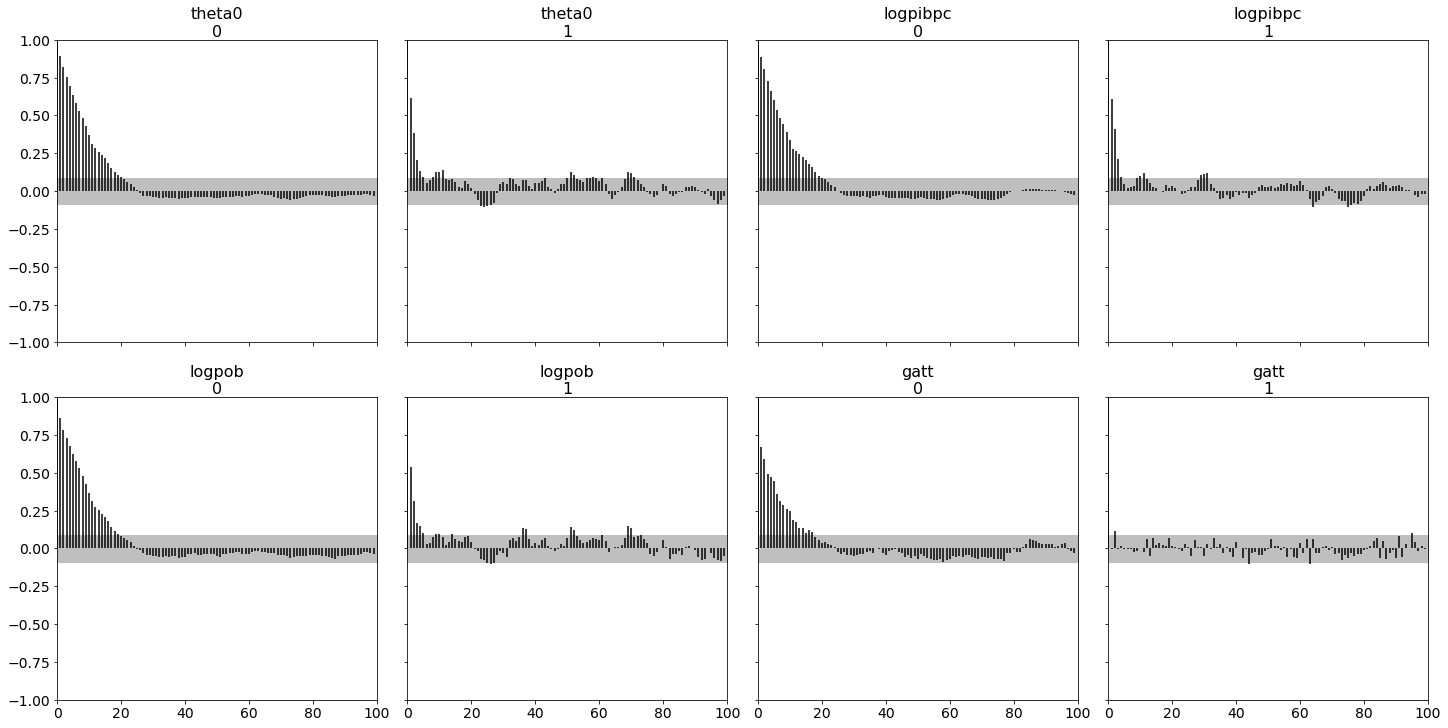

In [ ]:
pm.plots.autocorrplot(trace_4, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63492e6ad0>,
      dtype=object)

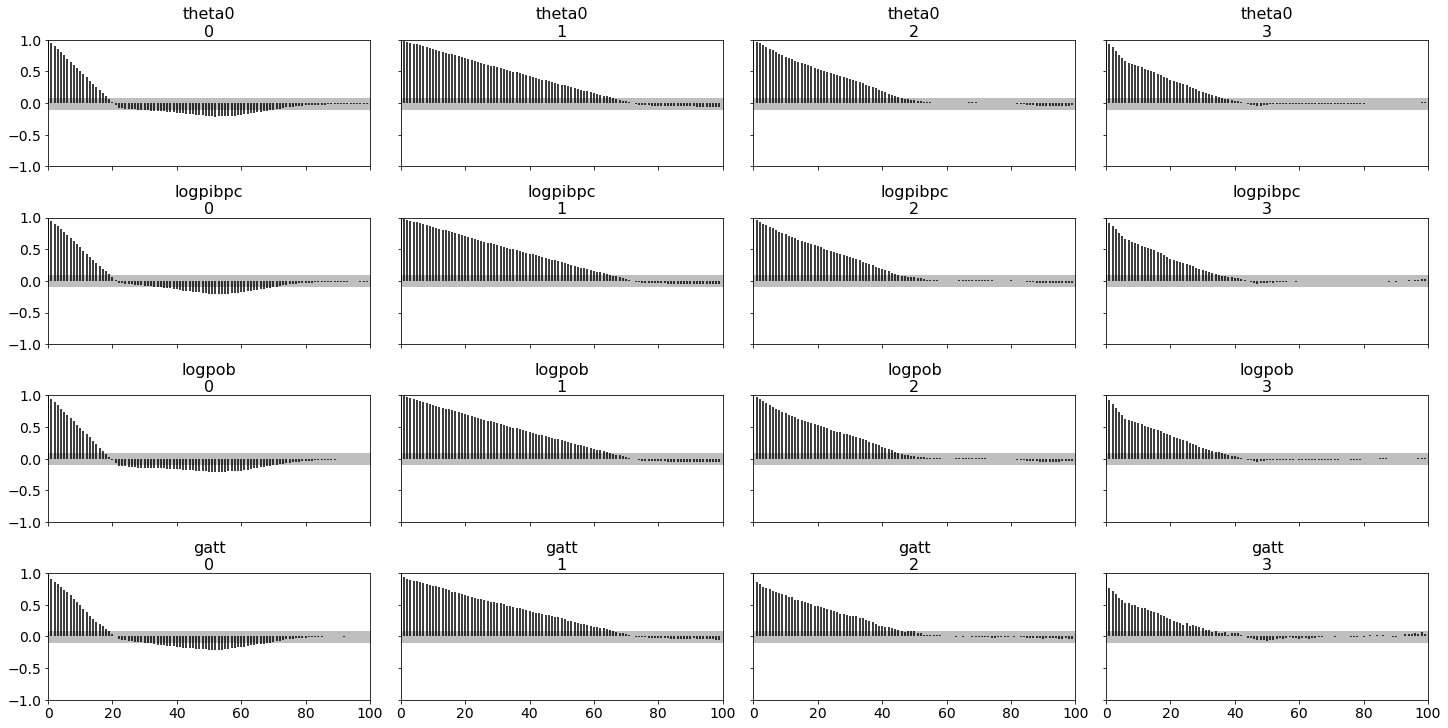

In [ ]:
pm.plots.autocorrplot(trace_3, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6349595690>,
      dtype=object)

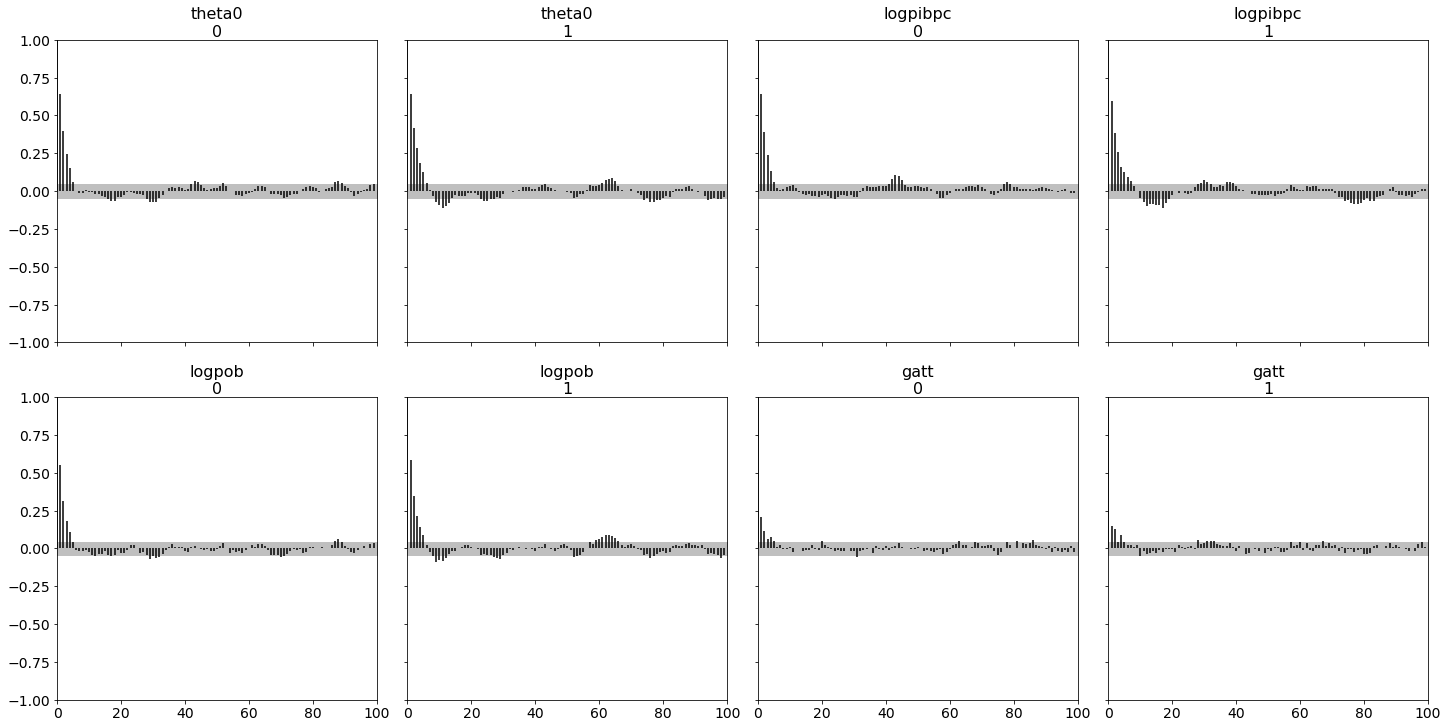

In [ ]:
pm.plots.autocorrplot(trace_2, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63548d7e10>,
      dtype=object)

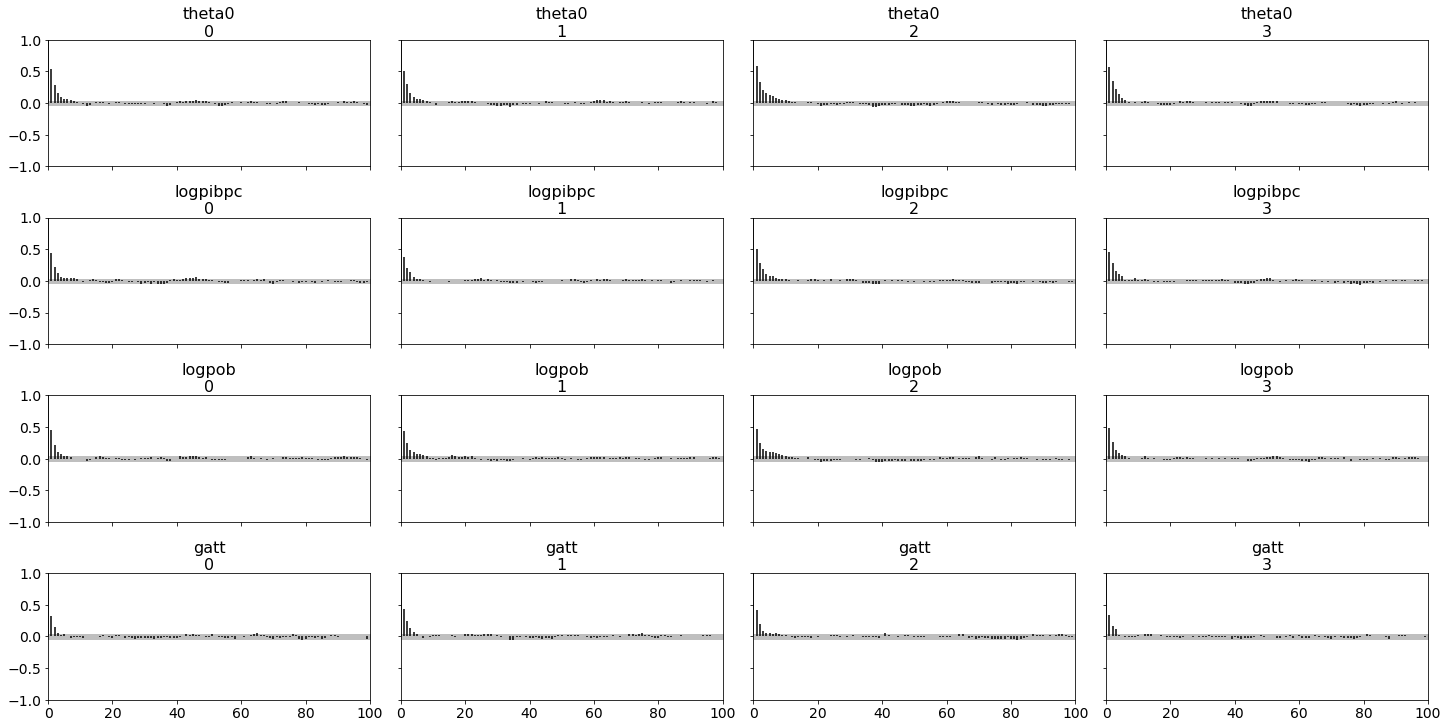

In [ ]:
pm.plots.autocorrplot(trace_1, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f634884a210>,
      dtype=object)

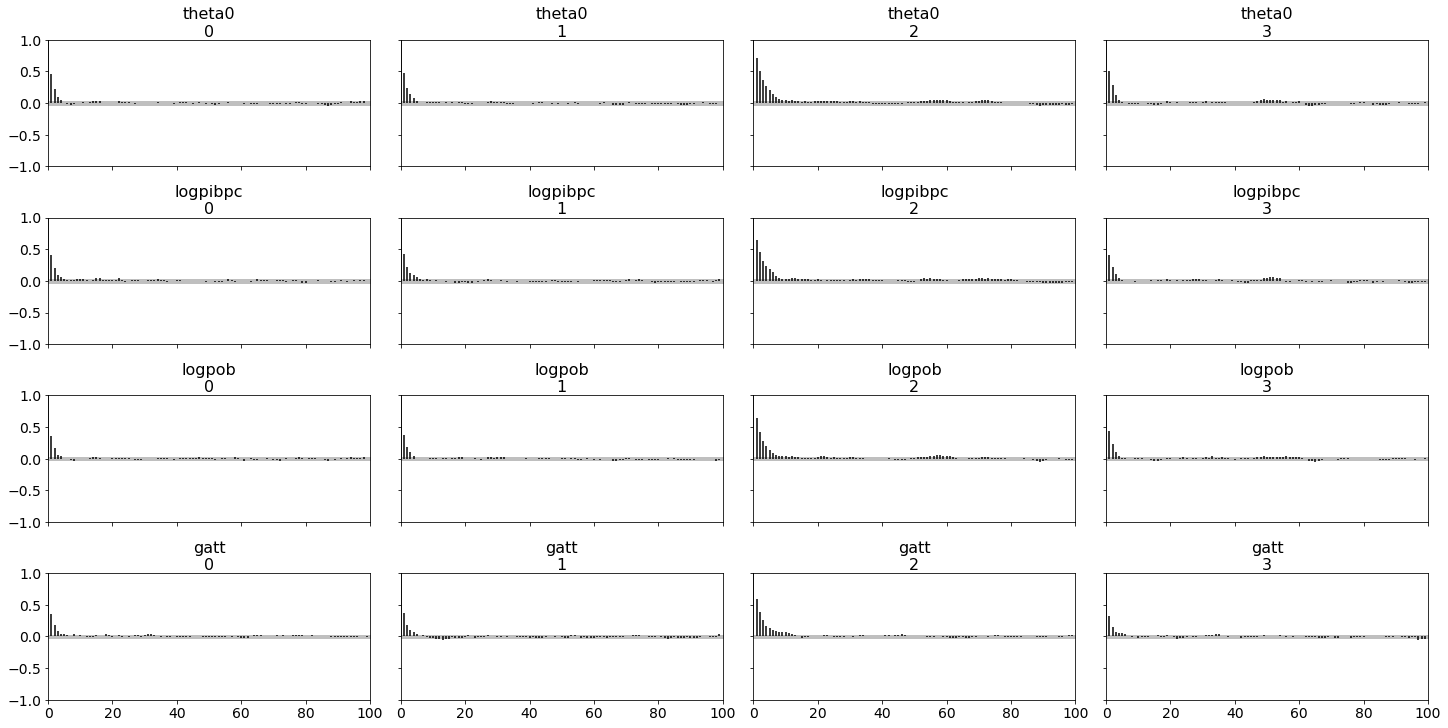

In [ ]:
pm.plots.autocorrplot(trace_0, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'])

### Análisis de la autocorrelación

Como era de esperar, la autocorrelación en trace_5 esta muy lejos de alguna convergencia que evidencie una independencia de los datos, ya que son pocas muestras. Al aumentar la cantidad de muestras a 500, notamos una notable mejora, que se acerca bastante a la convergencia, sin embargo, trace_4 y trace_3 tienen exactamente la misma cantidad de muestas, pero la autocorrelación es muy diferente. La diferencia de las convergencias entre ambas trazas, se debe a que se aumenta el número de cadenas al doble en trace_3, lo que produce este efecto es la baja cantidad de draws establecido en sus hiperparámetros. Es por esta razón que se aumenta considerablemente la cantidad de muestras para los siguientes casos, mostrando una gran mejora respecto a su correlación, logrando, en las trazas 1 y 0, una mejora considerable en su convergencia.

## 1.4. Gráficos posterior predictivo con NUTS

Para esta sección, se eligió la configuración de hiperparámetros de trace_0, ya que fue la que mejor resultados entregó

In [ ]:
with funcion_poisson:
    posterior_predictive_0 = pm.sample_posterior_predictive(trace_0, samples=100, var_names=['poiss' , 'mu', 'theta0', 'logpibpc', 'logpob', 'gatt'])

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


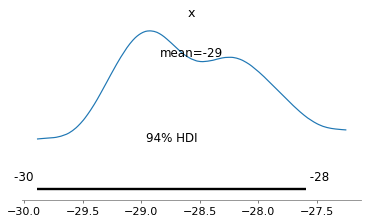

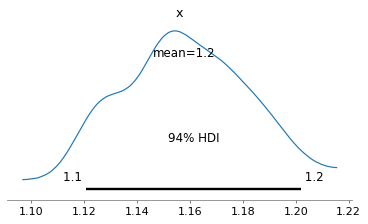

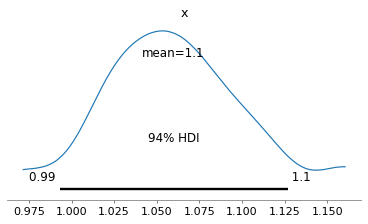

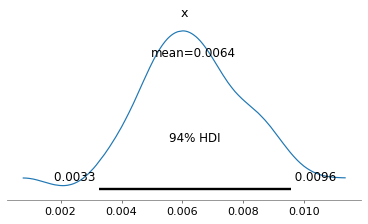

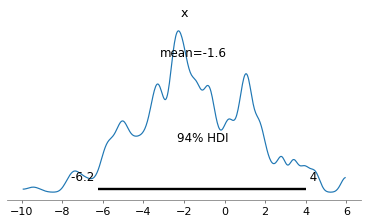

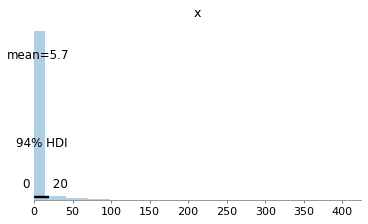

In [ ]:
pm.plot_posterior(posterior_predictive_0['theta0'], figsize=(5, 3))
pm.plot_posterior(posterior_predictive_0['logpob'], figsize=(5, 3))
pm.plot_posterior(posterior_predictive_0['logpibpc'], figsize=(5, 3))
pm.plot_posterior(posterior_predictive_0['gatt'], figsize=(5, 3))
pm.plot_posterior(posterior_predictive_0['mu'], figsize=(5, 3))
pm.plot_posterior(posterior_predictive_0['poiss'], figsize=(5, 3))

In [ ]:
print("mediana de poiss: ",np.median(posterior_predictive_0["poiss"]))
print("mediana de theta: ",np.median(posterior_predictive_0["theta0"]))
print("mediana de mu: ", np.median(posterior_predictive_0["mu"]))
print("mediana de logpibpc: ",np.median(posterior_predictive_0["logpibpc"]))
print("mediana de logpob: ", np.median(posterior_predictive_0["logpob"]))
print("mediana de gatt: ", np.median(posterior_predictive_0["gatt"]))

mediana de poiss:  0.0
mediana de theta:  -28.640204091893086
mediana de mu:  -1.7509331604351628
mediana de logpibpc:  1.055730678325733
mediana de logpob:  1.156664405230452
mediana de gatt:  0.00627590368299937


### Análisis posterior predictivo

las distribuciónes de los posteriors estan representadas gráficamente en esta sección, teniendo como medias aproximadas:
- theta0 = -29
- logpibpc = 1.1
- logpob = 1.2
- gatt = 0.0064
- mu = -1.6
- poiss = 5.7

Intervalos de alta densidad aproximados son:
- theta0 = (-29.9) a (-27.4)
- logpibpc = (0.99) a (1.125)
- logpob = (1.12) a (1.20)
- gatt = (0.033) a (0.0096)
- mu = (-6.2) a (4)
- poiss = (0) a (20)

### Puntos a destacar

NUTS, al mostrar eficiencia en sus entrenamientos, muestra una definición clara y visible de sus posteriors, logrando una forma que se asimila a una de campana de gauss en lo que respecta a sus distribuciónes.



# 2. Entrenamiento con Metropolis

Luego de probar con muchas combinaciones de hiperparámetros y no llegar a algún resultado decente, se tomó la desición de crear un nuevo modelo con los datos de entrada normalizados

In [ ]:
y = y.T
x = (x-x.mean())/x.std()
y = (y-np.mean(y))/np.std(y)

In [ ]:
with pm.Model() as funcion_poisson1:
    # define priors, weakly informative Normal
    b0 = pm.Normal('theta0', mu=0, sd=20, shape=())
    b1 = pm.Normal("logpibpc", mu=0, sd=20, shape=())
    b2 = pm.Normal("logpob", mu=0, sd=20, shape=())
    b3 = pm.Normal("gatt", mu=0, sd=20, shape=())

    # define linear model and exp link function
    theta = (
        b0 
        + b1 * x[:,:1]
        + b2 * x[:,1:2]
        + b3 * x[:,2:3]
    )
    
    #Variable Determinista
    mu = pm.Deterministic("mu", theta)
    
    
    ## Define Poisson likelihood
    poiss = pm.Poisson("poiss", mu=np.exp(mu), observed=y[0])

In [ ]:
with funcion_poisson:
  trace_metropolis_5 = pm.sample(draws=1000, tune = 200, chains=2, cores=4, step=pm.Metropolis())
  trace_metropolis_4 = pm.sample(draws=10000, tune = 800, chains=2, cores=4, step=pm.Metropolis())
  trace_metropolis_3 = pm.sample(draws=20000, tune = 2500, chains=2, cores=4, step=pm.Metropolis())
  trace_metropolis_2 = pm.sample(draws=40000, tune = 5000, chains=4, cores=4, step=pm.Metropolis())
  trace_metropolis_1 = pm.sample(draws=60000, tune = 7500, chains=4, cores=4, step=pm.Metropolis())
  trace_metropolis_0 = pm.sample(draws=100000, tune = 10000, chains=4, cores=4, step=pm.Metropolis())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [gatt]
>Metropolis: [logpob]
>Metropolis: [logpibpc]
>Metropolis: [theta0]
/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),


Sampling 2 chains for 200 tune and 1_000 draw iterations (400 + 2_000 draws total) took 3 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [gatt]
>Metropolis: [logpob]
>Metropolis: [logpibpc]
>Metropolis: [theta0]


/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 2 chains for 800 tune and 10_000 draw iterations (1_600 + 20_000 draws total) took 23 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  after removing the cwd from sys.path.
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [gatt]
>Metropolis: [logpob]
>M

/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 2 chains for 2_500 tune and 20_000 draw iterations (5_000 + 40_000 draws total) took 47 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  """
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [gatt]
>Metropolis: [logpob]
>Metropolis: [logpibpc]
>Metropolis: [theta0]
/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.e

/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 4 chains for 5_000 tune and 40_000 draw iterations (20_000 + 160_000 draws total) took 195 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [gatt]
>Metropolis: [logpob]
>Metropolis: [logpibpc]
>Metropolis: [theta0]
/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in e

/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 4 chains for 7_500 tune and 60_000 draw iterations (30_000 + 240_000 draws total) took 289 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [gatt]
>Metropolis: [logpob]
>Metropolis: [logpibpc]
>Metropolis: [theta0]


/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 4 chains for 10_000 tune and 100_000 draw iterations (40_000 + 400_000 draws total) took 490 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


## 2.1 Gráficos para cada traza

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


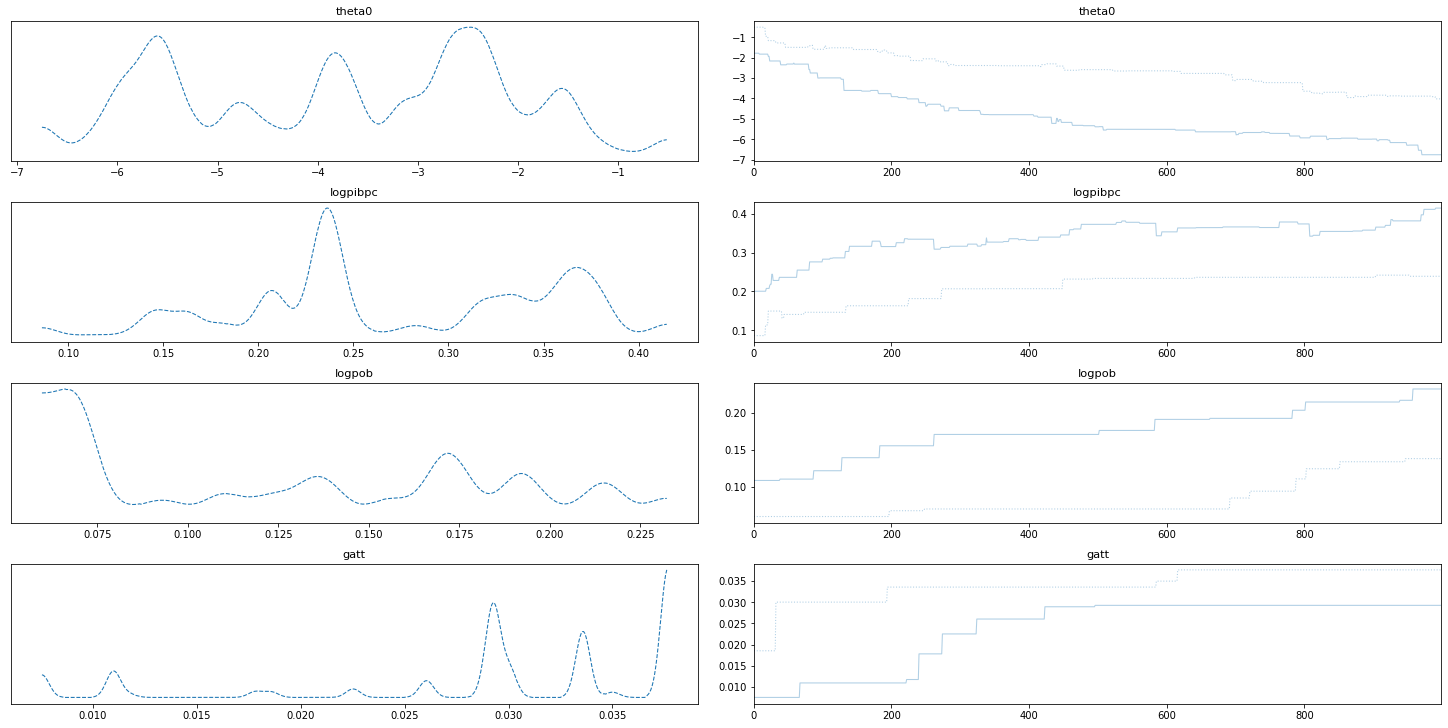

In [ ]:
pm.traceplot(trace_metropolis_5, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'], combined=True);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


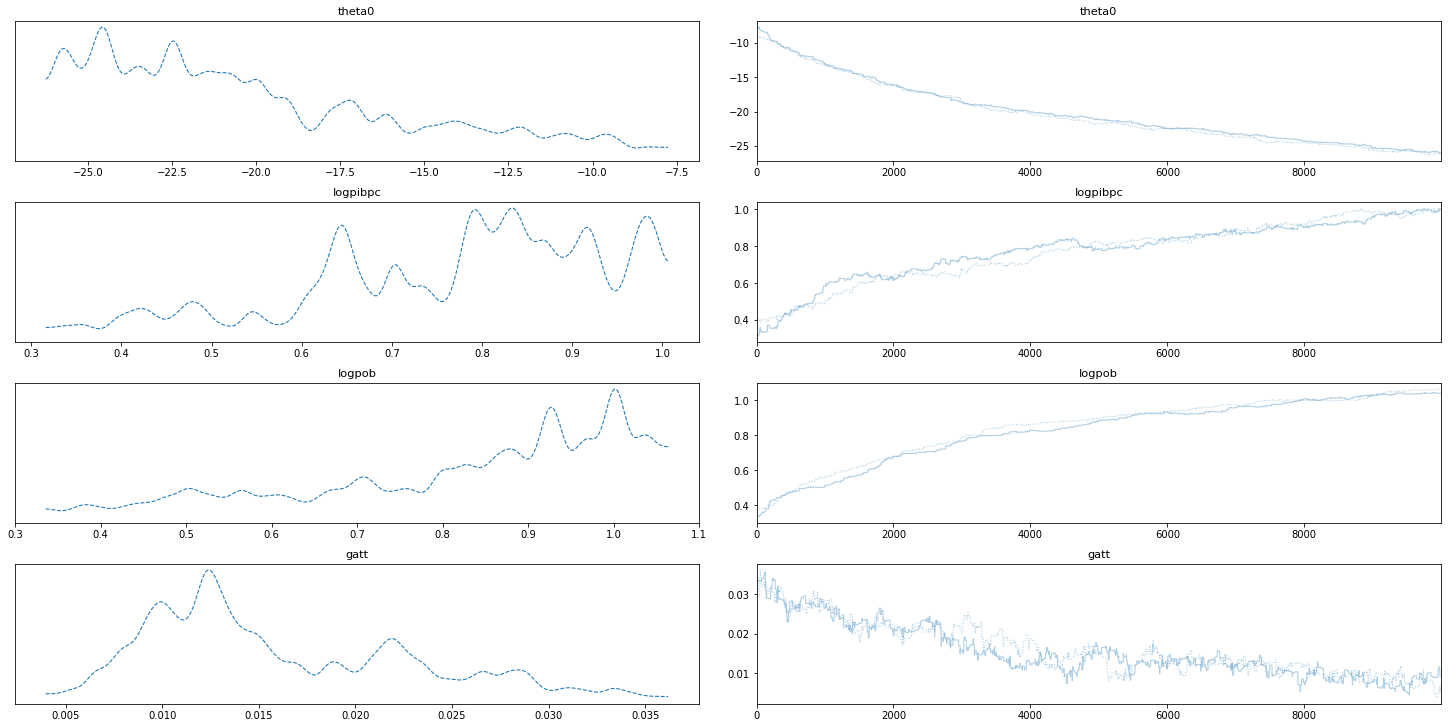

In [ ]:
pm.traceplot(trace_metropolis_4, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'], combined=True);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


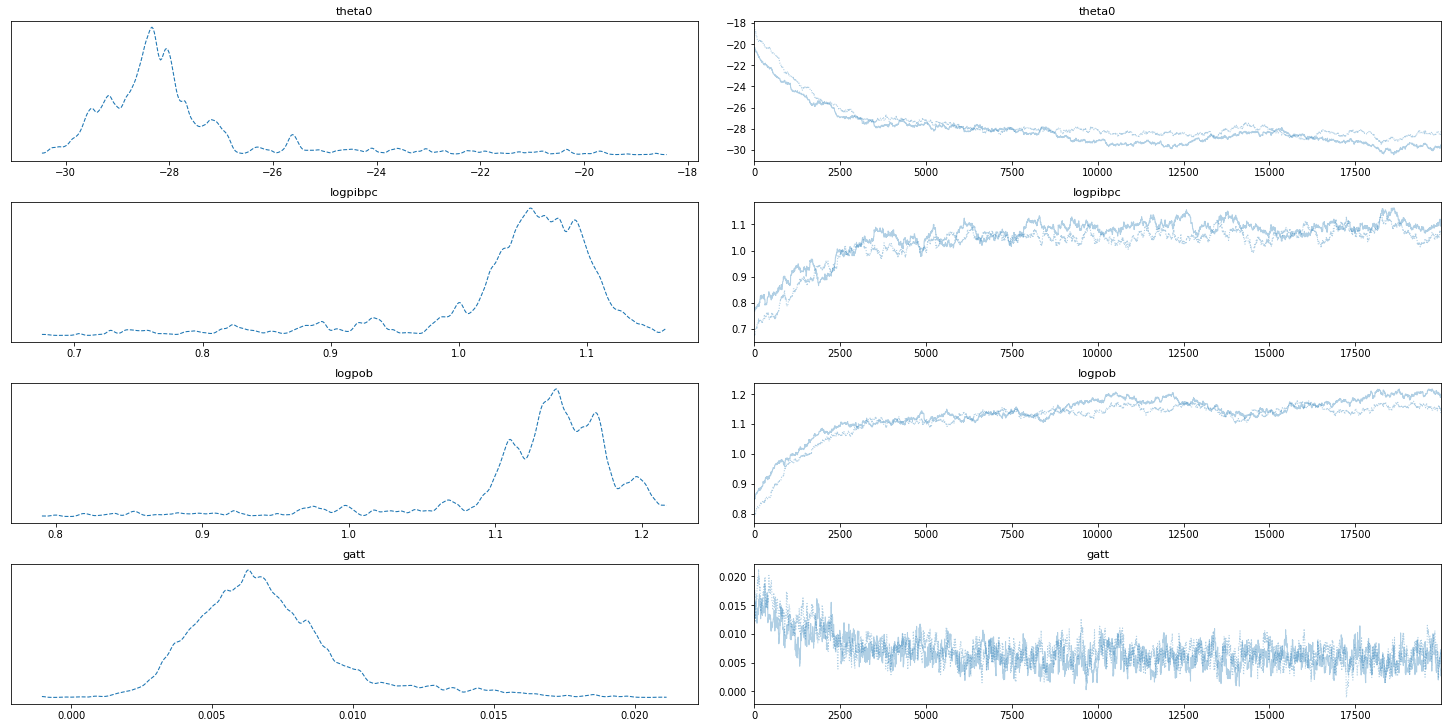

In [ ]:
pm.traceplot(trace_metropolis_3, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'], combined=True);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


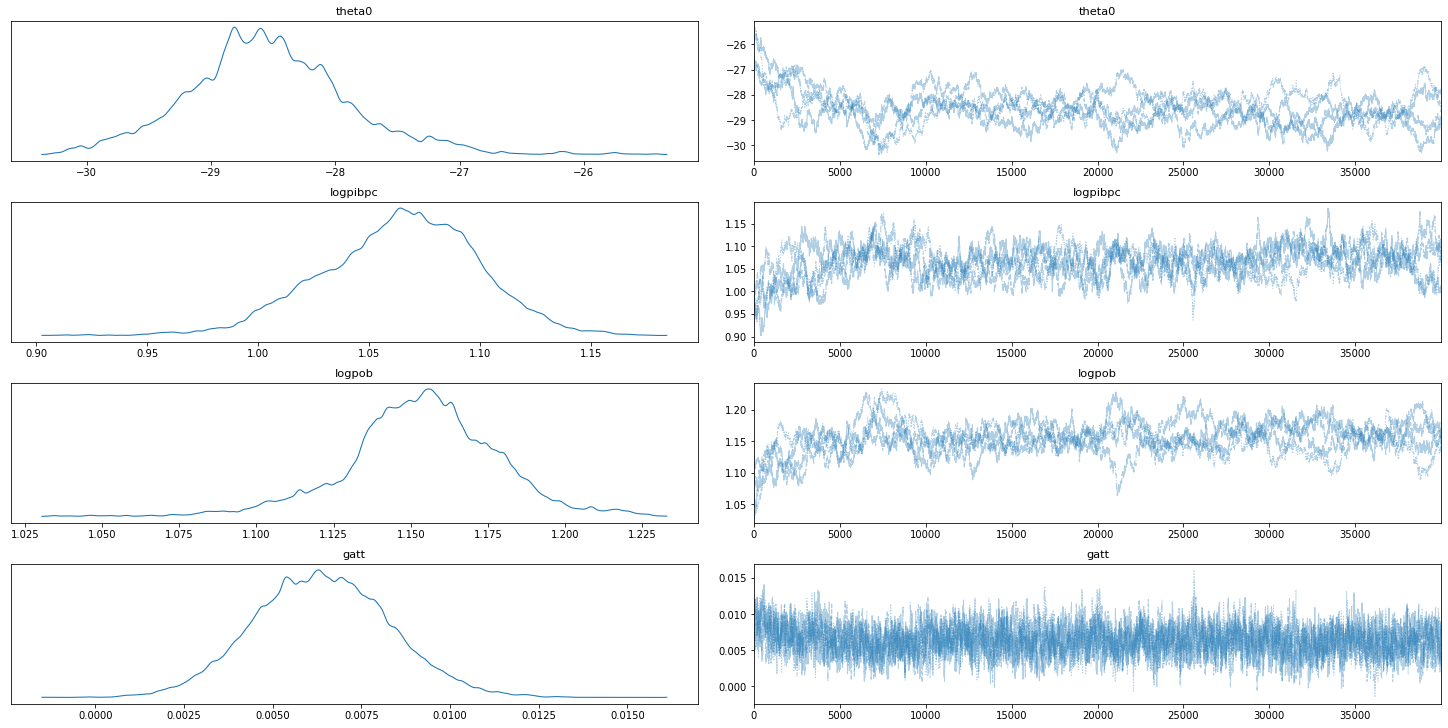

In [ ]:
pm.traceplot(trace_metropolis_2, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'], combined=True);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


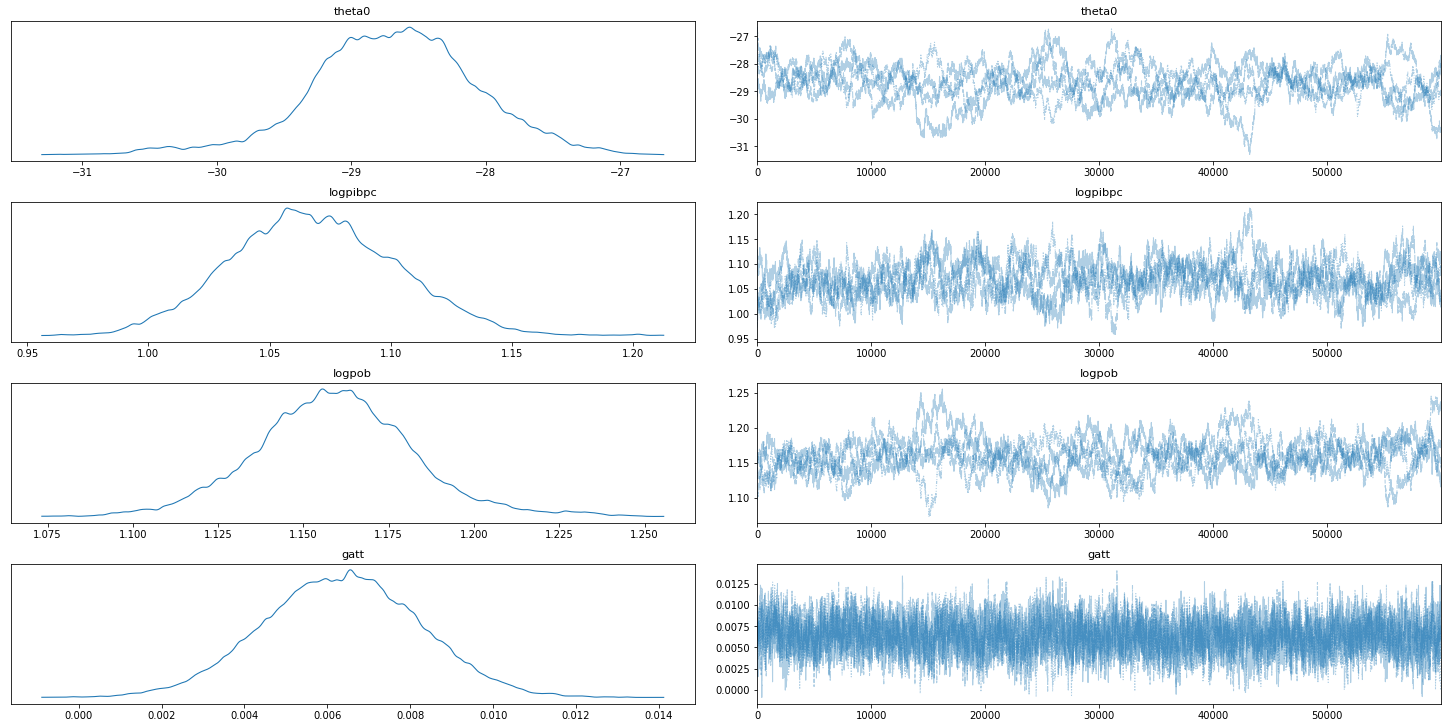

In [ ]:
pm.traceplot(trace_metropolis_1, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'], combined=True);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


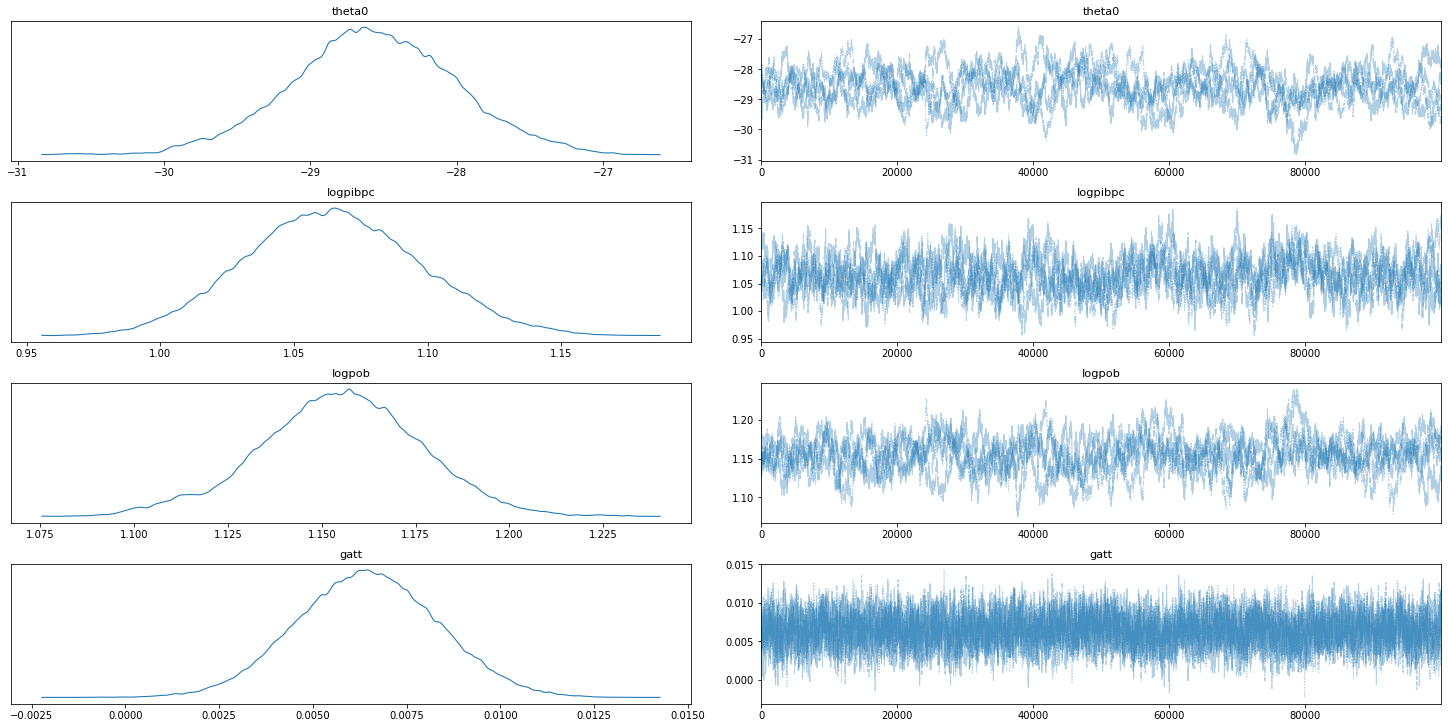

In [ ]:
pm.traceplot(trace_metropolis_0, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'], combined=True);

### Análisis de la evolución de las trazas

Como podemos ver en la evolución de las trazas, estas comienzan teniendo formas completamente amorfas, con una gran cantidad de datos si se compara con NUTS, ya que no es hasta los 40000 muestras que se comienza a tener forma de ruido blanco. Se decidió tener un tune que ronda entre el 10% y 20% de draws aproximadamente, ya que dentro de este rango se encontraron mejores resultados. Se puede observar tambien que para que las trazas comienzen a tener algun sentido, se necesitan una cantidad excesiva de datos, ya que recien entre los 60.000 y 100.000 muestras podemos apreciar una forma definida de la misma.


## 2.2. Sumary de cada traza


In [ ]:
pm.summary(trace_metropolis_5, var_names=['theta0', 'logpibpc', 'logpob', 'gatt']).round(3)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
theta0   -3.752  1.540  -6.163   -1.500  ...    0.836       2.0       9.0   2.37
logpibpc  0.274  0.077   0.146    0.382  ...    0.043       2.0      10.0   2.61
logpob    0.129  0.055   0.060    0.215  ...    0.030       2.0       6.0   2.81
gatt      0.029  0.008   0.011    0.038  ...    0.004       2.0       5.0   3.09

[4 rows x 9 columns]

In [ ]:
pm.summary(trace_metropolis_4, var_names=['theta0', 'logpibpc', 'logpob', 'gatt']).round(3)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
theta0   -20.262  4.526 -26.279  -11.618  ...    2.207       3.0      25.0   1.83
logpibpc   0.773  0.161   0.460    1.002  ...    0.077       3.0      29.0   1.77
logpob     0.836  0.181   0.493    1.065  ...    0.088       3.0      15.0   1.84
gatt       0.016  0.007   0.007    0.029  ...    0.003       3.0      32.0   1.57

[4 rows x 9 columns]

In [ ]:
pm.summary(trace_metropolis_3, var_names=['theta0', 'logpibpc', 'logpob', 'gatt']).round(3)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
theta0   -27.798  1.863 -30.372  -23.899  ...    0.640       3.0      12.0   1.69
logpibpc   1.040  0.078   0.874    1.149  ...    0.024       4.0      26.0   1.37
logpob     1.125  0.067   0.990    1.217  ...    0.023       3.0      13.0   1.59
gatt       0.007  0.003   0.003    0.013  ...    0.001      14.0      25.0   1.09

[4 rows x 9 columns]

In [ ]:
pm.summary(trace_metropolis_2, var_names=['theta0', 'logpibpc', 'logpob', 'gatt']).round(3)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
theta0   -28.536  0.661 -29.791  -27.228  ...    0.059      62.0     115.0   1.08
logpibpc   1.064  0.035   0.998    1.128  ...    0.003      84.0     160.0   1.05
logpob     1.154  0.025   1.103    1.199  ...    0.002      74.0     154.0   1.07
gatt       0.006  0.002   0.003    0.010  ...    0.000     396.0    1449.0   1.01

[4 rows x 9 columns]

In [ ]:
pm.summary(trace_metropolis_1, var_names=['theta0', 'logpibpc', 'logpob', 'gatt']).round(3)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
theta0   -28.682  0.616 -29.771  -27.422  ...    0.045      99.0     113.0   1.02
logpibpc   1.068  0.034   1.005    1.132  ...    0.002     160.0     357.0   1.02
logpob     1.159  0.024   1.114    1.205  ...    0.002     106.0     120.0   1.02
gatt       0.006  0.002   0.003    0.010  ...    0.000     678.0    2742.0   1.01

[4 rows x 9 columns]

In [ ]:
pm.summary(trace_metropolis_0, var_names=['theta0', 'logpibpc', 'logpob', 'gatt']).round(3)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
theta0   -28.569  0.562 -29.655  -27.509  ...    0.037     117.0     234.0   1.04
logpibpc   1.064  0.032   1.004    1.126  ...    0.002     209.0     779.0   1.02
logpob     1.155  0.022   1.111    1.194  ...    0.001     143.0     270.0   1.04
gatt       0.006  0.002   0.003    0.010  ...    0.000    1330.0    5924.0   1.00

[4 rows x 9 columns]

### Análisis de summary para cada traza

Es en este análisis donde notamos la increíble inferioridad del algoritmo de MCMC metrópolis frente a NUTS para este caso en específico, ya que a medida que se acerca a la cantidad óptima encontrada de muestras, el número de muestras efectivo aumenta ínfimamente. En el primer caso, con traza trace_metropolis__5, notamos un número de muestras efectivo del 0.0083% del total de 2400 muestras, hasta llegar al último caso con un total de 260000 muestras, obteniendo entre 117 y 1330 muestras efectivas, lo que supone una porción entre 0.045% a un 0.51%. Esto nos deja en evidencia la poca efectividad que tiene el algoritmo de metrópolis para este dataset con el modelo propuesto.

## 2.3. Gráficos de atuocorrelación

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6338023710>,
      dtype=object)

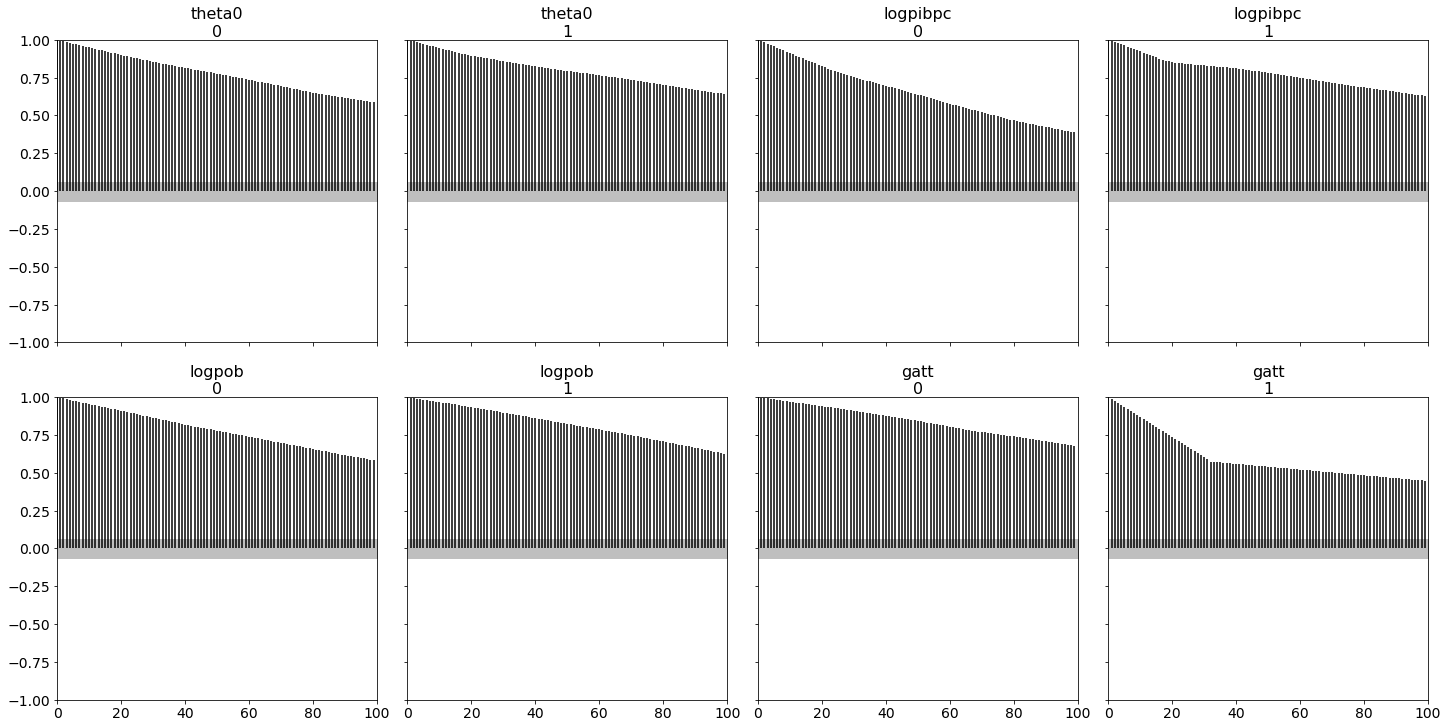

In [ ]:
pm.plots.autocorrplot(trace_metropolis_5, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63371c0710>,
      dtype=object)

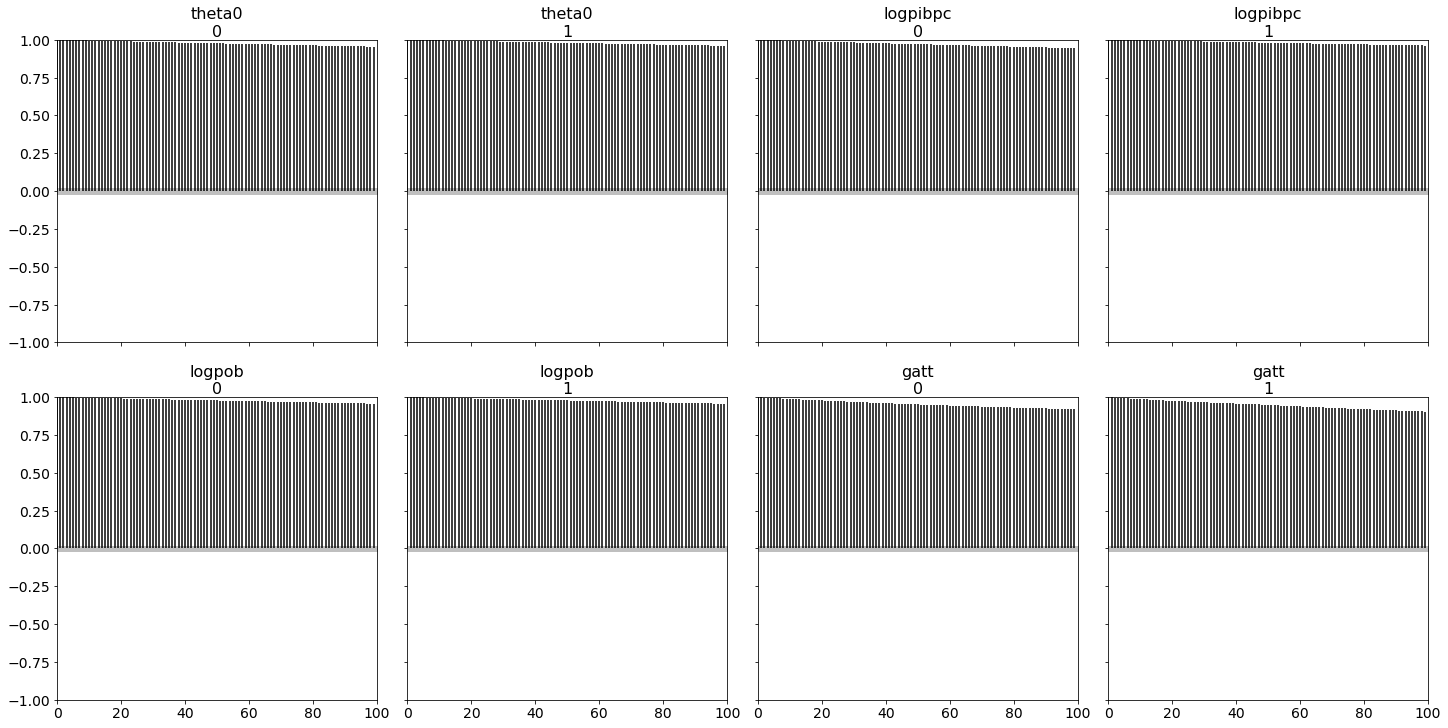

In [ ]:
pm.plots.autocorrplot(trace_metropolis_4, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63405be450>,
      dtype=object)

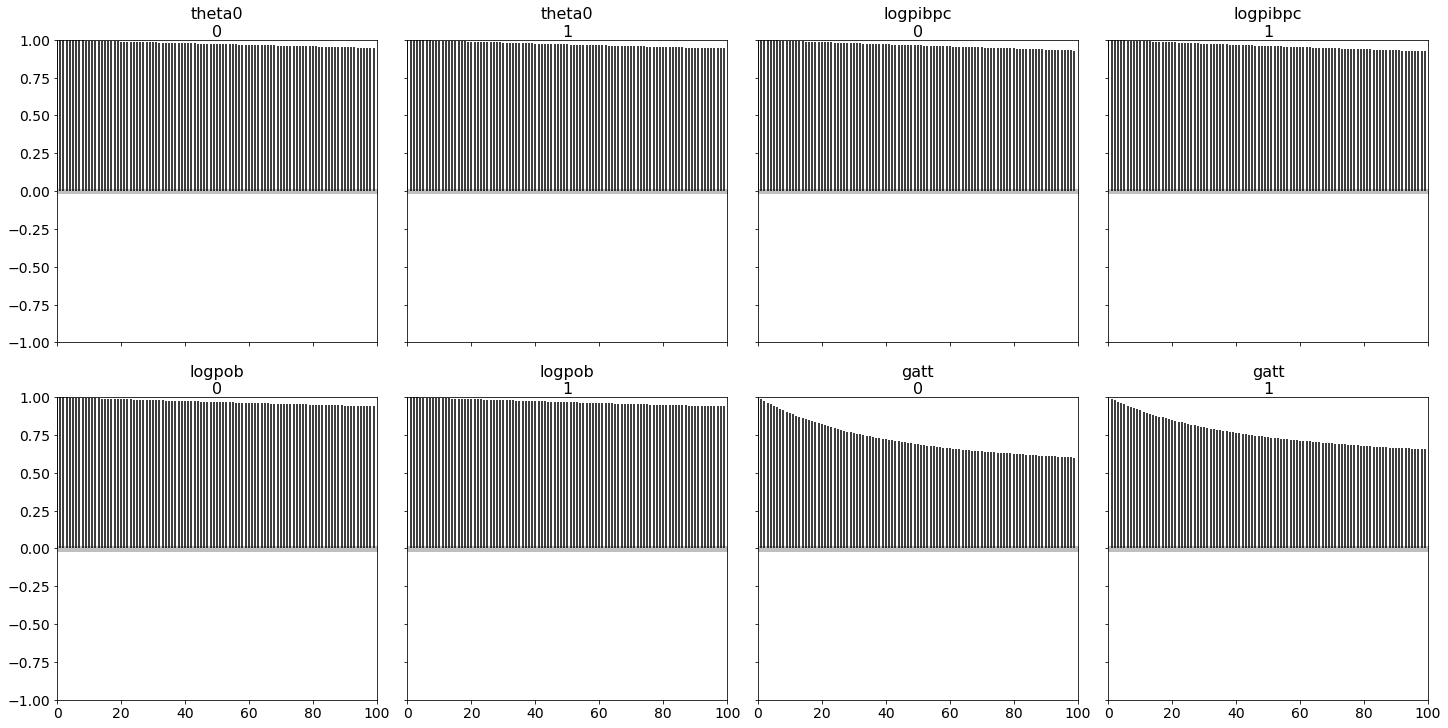

In [ ]:
pm.plots.autocorrplot(trace_metropolis_3, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f633ec6e390>,
      dtype=object)

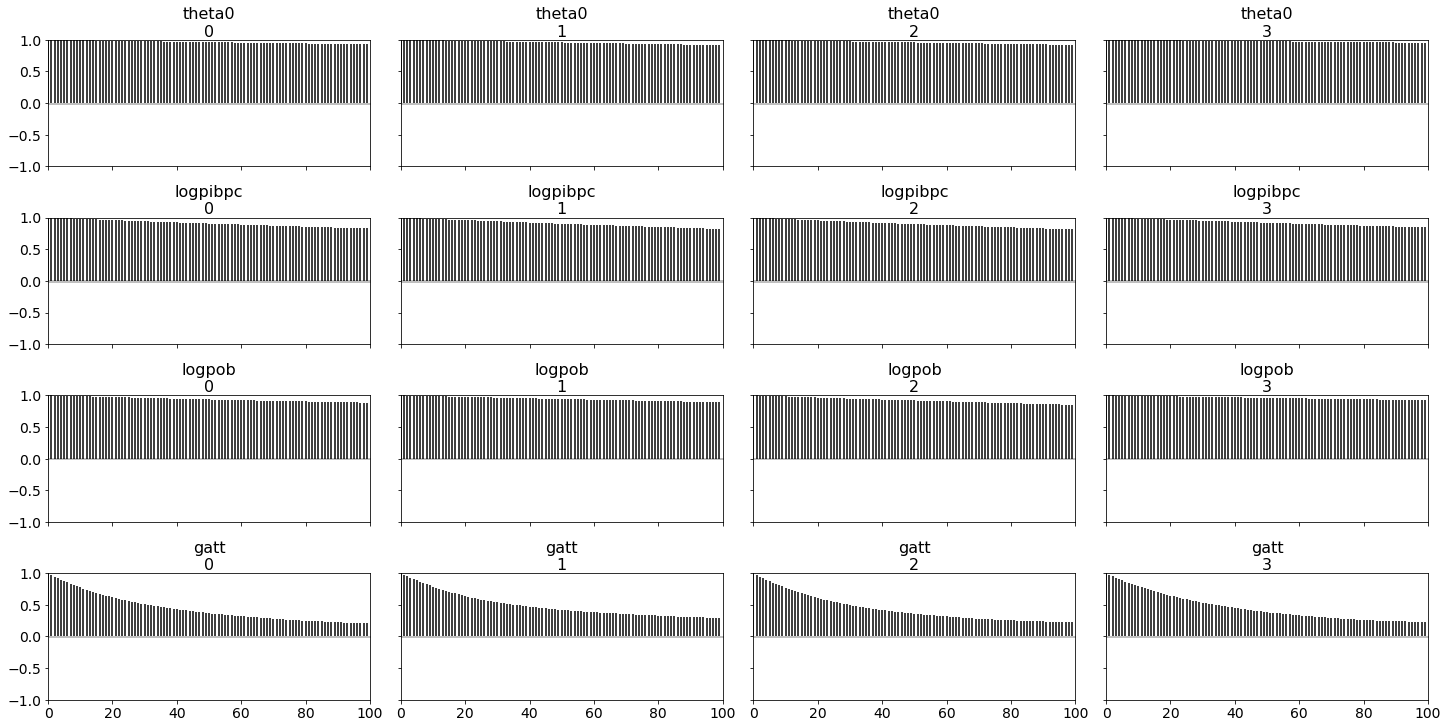

In [ ]:
pm.plots.autocorrplot(trace_metropolis_2, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63418b77d0>,
      dtype=object)

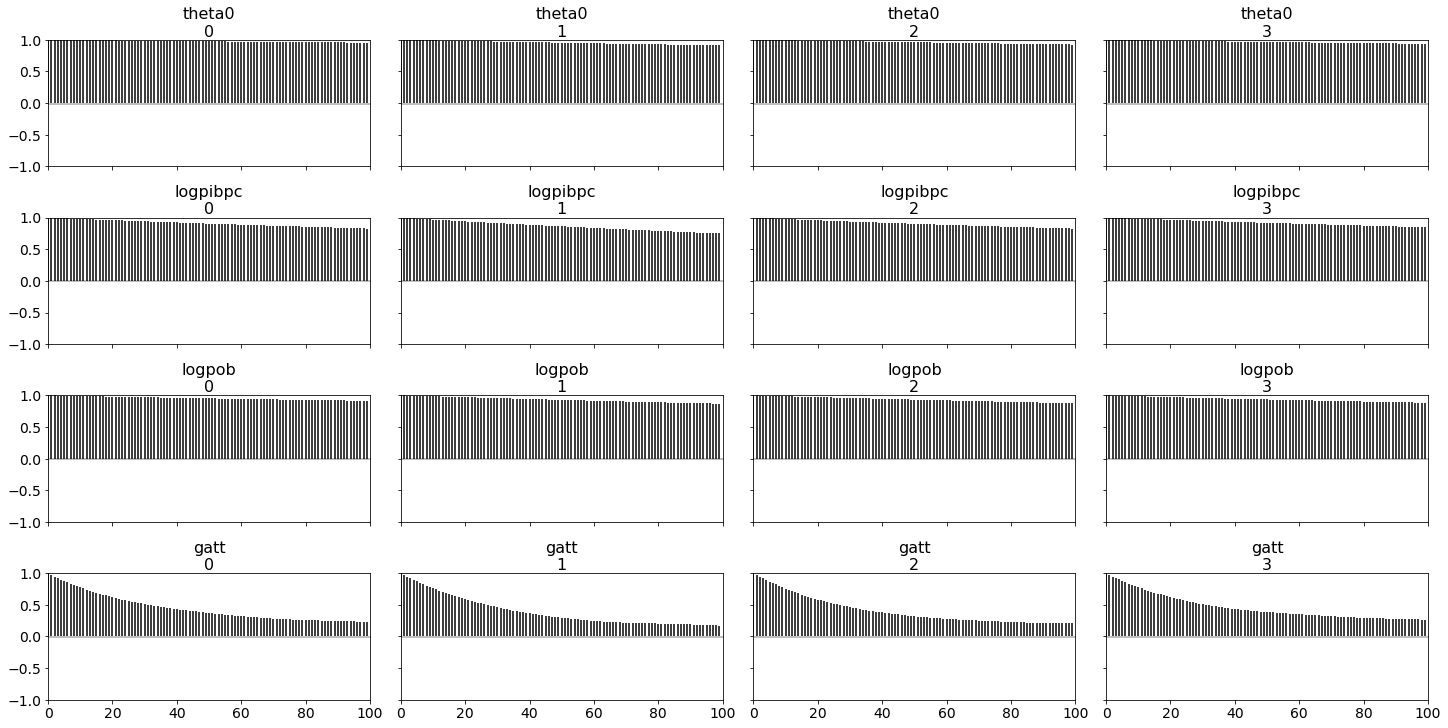

In [ ]:
pm.plots.autocorrplot(trace_metropolis_1, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f633a441850>,
      dtype=object)

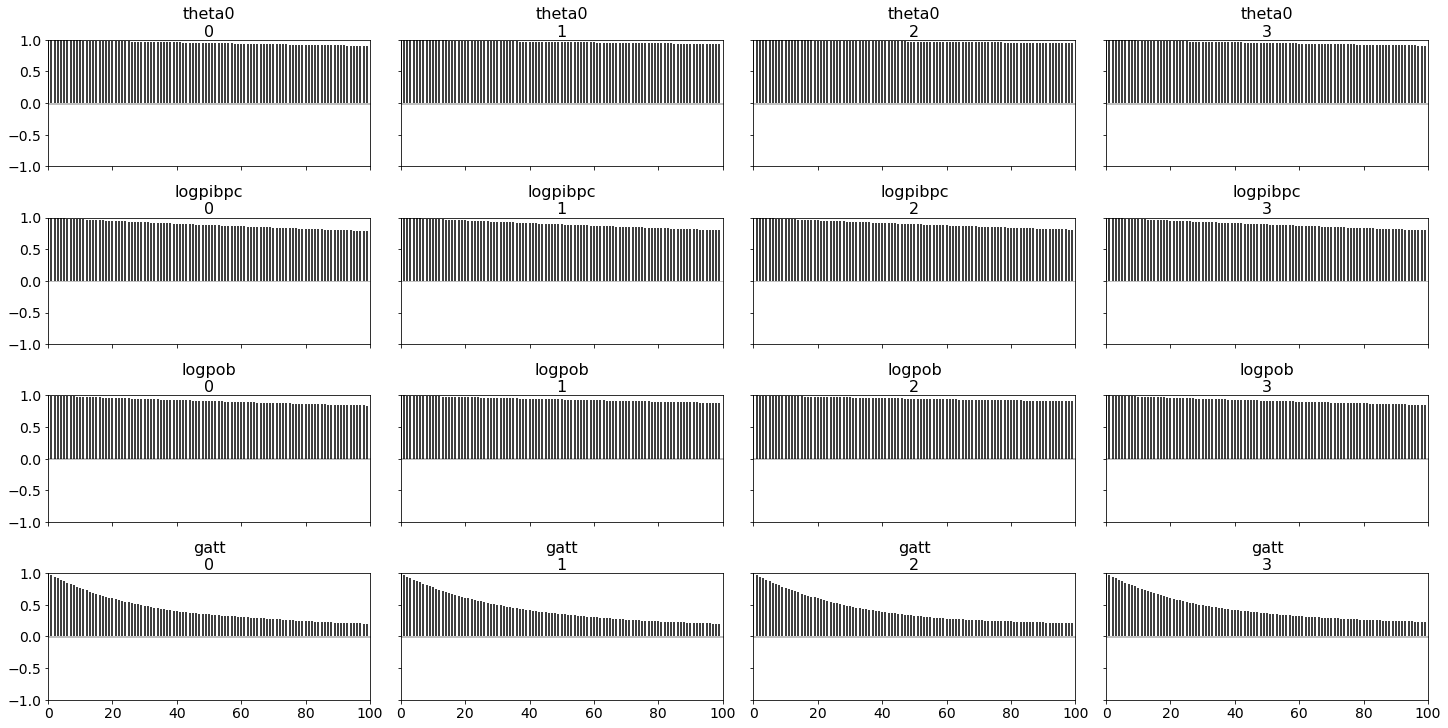

In [ ]:
pm.plots.autocorrplot(trace_metropolis_0, figsize=(20, 10), var_names=['theta0', 'logpibpc', 'logpob', 'gatt'])

### Análisis de la autocorrelación

Visualizando la autocorrelación de los priors, podemos observar lo que mencionábamos antes, la poca efectividad al momento de entrenar el modelo. Esta vez, podemos observar que en ningun momento, algún prior alcanza la convergencia, contando solo con una leve mejora en "gatt", el cual evoluciona de una nula convergencia en la configuración de los hiperparámetros correspondientes a la traza trace_metropolis_5, a acercarse bastante a la convergencia en el ajuste de trace_metropolis_0.

## 2.4. Gráficos posterior predictivo con Metrópolis

In [ ]:
with funcion_poisson:
    posterior_predictive_0_m = pm.sample_posterior_predictive(trace_metropolis_0, samples=100, var_names=['poiss' , 'mu', 'theta0', 'logpibpc', 'logpob', 'gatt'])

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


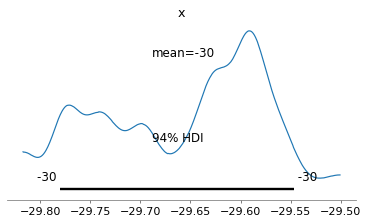

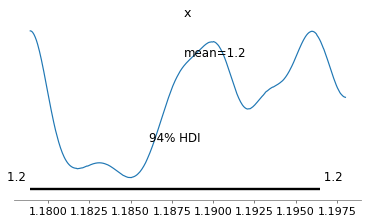

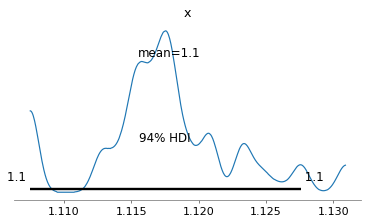

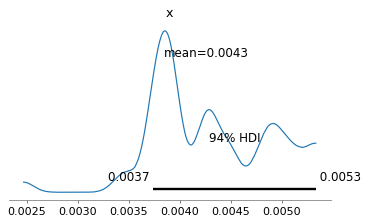

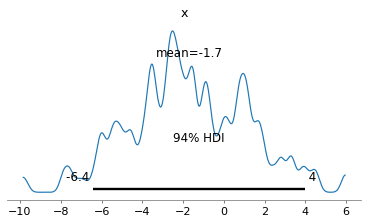

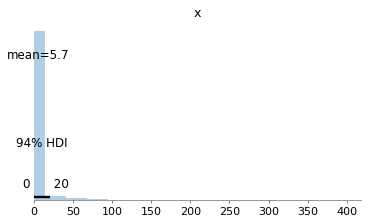

In [ ]:
pm.plot_posterior(posterior_predictive_0_m['theta0'], figsize=(5, 3))
pm.plot_posterior(posterior_predictive_0_m['logpob'], figsize=(5, 3))
pm.plot_posterior(posterior_predictive_0_m['logpibpc'], figsize=(5, 3))
pm.plot_posterior(posterior_predictive_0_m['gatt'], figsize=(5, 3))
pm.plot_posterior(posterior_predictive_0_m['mu'], figsize=(5, 3))
pm.plot_posterior(posterior_predictive_0_m['poiss'], figsize=(5, 3))

In [ ]:
print("mediana de poiss: ",np.median(posterior_predictive_0_m["poiss"]))
print("mediana de theta: ",np.median(posterior_predictive_0_m["theta0"]))
print("mediana de mu: ", np.median(posterior_predictive_0_m["mu"]))
print("mediana de logpibpc: ",np.median(posterior_predictive_0_m["logpibpc"]))
print("mediana de logpob: ", np.median(posterior_predictive_0_m["logpob"]))
print("mediana de gatt: ", np.median(posterior_predictive_0_m["gatt"]))

mediana de poiss:  0.0
mediana de theta:  -29.627670462886275
mediana de mu:  -1.8726296665977387
mediana de logpibpc:  1.1175961795682043
mediana de logpob:  1.1904651973756748
mediana de gatt:  0.004183345171314513


### Análisis posterior predictivo con Metrópolis

las distribuciónes de los posteriors estan representadas gráficamente en esta sección, teniendo como medias aproximadas:
- theta0 = -30
- logpibpc = 1.1
- logpob = 1.2
- gatt = 0.0043
- mu = -1.7
- poiss = 5.7

Intervalos de alta densidad aproximados son:
- theta0 = (-29.8) a (-29.55)
- logpibpc = (1.110) a (1.127)
- logpob = (1.180) a (1.197)
- gatt = (0.0037) a (0.0053)
- mu = (-6.4) a (4)
- poiss = (0) a (20)

### Puntos a destacar
Metrópolis, al no ser eficiente bajo ningún punto de vista en este caso, mustra unos posterior que nunca alcanzan la convergencia, lo que se traduce en que el HDI no es confiable.

### Análisis general

En base a todos los parámetros vistos para cada algoritmo de MCMC, se puede decir que NUTS es ampliamente mejor al momento de entrenar y predecir que Metrópolis, logrando superarlo ampliamente en todos los puntos mencionados.
Otro punto a destacar, es que NUTS necesita mucho menos datos para aumentar su precisión y, por el contrario, Metrópolis es mucho mas rapido al momento de entrenar, pero se ve opacado por la gran cantidad de muestras que necesita para mostrar resultados.

# Respuestas de aplicación

In [ ]:
with funcion_poisson:
    posterior_predictivo = pm.sample_posterior_predictive(trace_0, samples=1000, var_names=['poiss' , 'mu', 'theta0', 'logpibpc', 'logpob', 'gatt'])

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


In [ ]:
promedio_pais = np.round(np.sum(posterior_predictivo["poiss"], axis=0)/1000).astype(int)

In [ ]:
promedio_pais

array([349,  18,   0,   0,   0,   1,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  18,   0,   0,   0,   0,   0,   0,   0,   3,
         4,   0,   0,   1,   1,  33,   0,   0,   2,   6,   0,   0,  52,
         3,  10,   7,   1,  54,   0,   0,   8,  28,   0,   3,  72,   7,
         6,   2,   3,   1,  43,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   0,   5,   0,   0,   0,   2,  28,   0,   0,   0,   2,   1,
         0,   0,   0,   4,   5,   6,   5,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   3,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   2,   0,   1,   1,   0,   4,  12,   1,   2,
         0,   0,   3,   5,   0,   2,   0,   1,   3,   1,   0,   0,   0,
         0,   0,   1,  82,   0,   0,  15,  94,  28,   0,   2,   1,   0,
         0,   0,   4,   0,   0,   1,   3,   2,   0,   3,   9,   

## **Actividad:** Prediga la cantidad de billonarios usando su modelo y la incertidumbre asociada (posterior predictivo). Muestre graficamente sus resultados

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


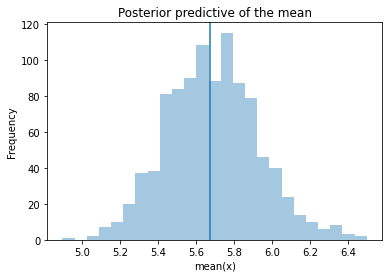

In [ ]:
ax = plt.subplot()
sns.distplot([poiss.mean() for poiss in posterior_predictive_2['poiss']], kde=False, ax=ax)
ax.axvline(datos['nbillonarios'].mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

In [ ]:
nreal = datos["nbillonarios"].T
mse = np.sqrt(mean_squared_error(promedio_pais, nreal))
print(mse)

12.346725248643148


In [ ]:
#Predicción de billonarios por país
for j in range(0, 196):
  print("País :", datos["pais"][j], "predicción de billonarios", promedio_pais[j])
#prediccion

País : United States predicción de billonarios 349
País : Canada predicción de billonarios 18
País : Bahamas, The predicción de billonarios 0
País : Aruba predicción de billonarios 0
País : Bermuda predicción de billonarios 0
País : Cuba predicción de billonarios 1
País : Haiti predicción de billonarios 0
País : Dominican Republic predicción de billonarios 1
País : Jamaica predicción de billonarios 0
País : Trinidad and Tobago predicción de billonarios 0
País : Barbados predicción de billonarios 0
País : Dominica predicción de billonarios 0
País : Grenada predicción de billonarios 0
País : St. Lucia predicción de billonarios 0
País : St. Vincent and the Grenadines predicción de billonarios 0
País : Antigua and Barbuda predicción de billonarios 0
País : St. Kitts and Nevis predicción de billonarios 0
País : Mexico predicción de billonarios 18
País : Belize predicción de billonarios 0
País : Guatemala predicción de billonarios 0
País : Honduras predicción de billonarios 0
País : El Salva

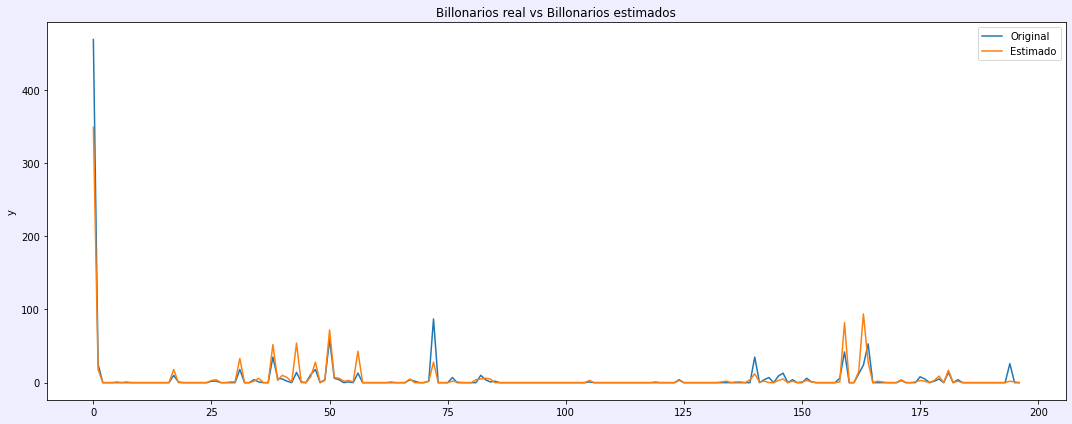

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6), tight_layout=True, facecolor='#EEF')
ax.plot(a, label = "Original")
ax.plot(promedio_pais, label = "Estimado")
ax.set_ylabel('y')
ax.set_title("Billonarios real vs Billonarios estimados")
ax.legend()

**En la celda anterior al gráfico, podemos observar la predicción hecha por nuestro modelo, esta tiene un error cuadrático medio de un 12.34% aproximadamente**

## **Actividad:** Países con mayor error de predicción

In [ ]:
#Países con mayor error de predicción
error = promedio_pais - nreal
for i in range(196):
  if (abs(error[i]) > 39):
    print("error de billonarios:", abs(error[i]),", país: ", datos["pais"][i])

error de billonarios: 120 , país:  United States
error de billonarios: 40 , país:  France
error de billonarios: 59 , país:  Russian Federation
error de billonarios: 40 , país:  China
error de billonarios: 70 , país:  Japan


## **Actividad:** Países con exceso de billonarios




In [ ]:
#Paises con exceso de billonarios
print("Paises con prediccion excesiva: ")
print("----------------------------------------------------------------------------")
for i in range(197):
  if (abs(error[i]) > mse):
    print("error: ", error[i], datos["pais"][i], " /// Cantidad real: ", datos["nbillonarios"][i], " Cantidad predicha: ", promedio_pais[i])
    #abs(posterior_predictive["poiss"][0] - y.T)/100
    porcentaje_error = (abs(error[i])*(100)/(datos["nbillonarios"][i])).round(2)
    print("Porcentaje de error: ", porcentaje_error)

Paises con prediccion excesiva: 
----------------------------------------------------------------------------
error:  -120 United States  /// Cantidad real:  469  Cantidad predicha:  349
Porcentaje de error:  25.59
error:  15 Brazil  /// Cantidad real:  18  Cantidad predicha:  33
Porcentaje de error:  83.33
error:  17 United Kingdom  /// Cantidad real:  35  Cantidad predicha:  52
Porcentaje de error:  48.57
error:  40 France  /// Cantidad real:  14  Cantidad predicha:  54
Porcentaje de error:  285.71
error:  13 Germany  /// Cantidad real:  59  Cantidad predicha:  72
Porcentaje de error:  22.03
error:  30 Italy  /// Cantidad real:  13  Cantidad predicha:  43
Porcentaje de error:  230.77
error:  -59 Russian Federation  /// Cantidad real:  87  Cantidad predicha:  28
Porcentaje de error:  67.82
error:  -23 Turkey  /// Cantidad real:  35  Cantidad predicha:  12
Porcentaje de error:  65.71
error:  40 China  /// Cantidad real:  42  Cantidad predicha:  82
Porcentaje de error:  95.24
error:  70

## **Actividad:** Países con menos billonarios de lo esperado

In [ ]:
# Paises con prediccion negativa mayor al error medio:
print("Paises con prediccion negativa:\n")
for i in range(197):
  if (error[i] < -mse):
    print( datos["pais"][i], " Cantidad real:", datos["nbillonarios"][i], "// Cantidad predicha:", promedio_pais[i], ",Error en predicción:", abs(error[i]),)
    #abs(posterior_predictive["poiss"][0] - y.T)/100
    porcentaje_error = abs((error[i]*(100)/(datos["nbillonarios"][i])).round(2))
    print("Porcentaje de error:", porcentaje_error,"\n")

Paises con prediccion negativa:

United States  Cantidad real: 469 // Cantidad predicha: 349 ,Error en predicción: 120
Porcentaje de error: 25.59 

Russian Federation  Cantidad real: 87 // Cantidad predicha: 28 ,Error en predicción: 59
Porcentaje de error: 67.82 

Turkey  Cantidad real: 35 // Cantidad predicha: 12 ,Error en predicción: 23
Porcentaje de error: 65.71 

India  Cantidad real: 53 // Cantidad predicha: 28 ,Error en predicción: 25
Porcentaje de error: 47.17 

Hong Kong SAR, China  Cantidad real: 26 // Cantidad predicha: 2 ,Error en predicción: 24
Porcentaje de error: 92.31 



## **Actividad:** ¿Que se puede decir sobre Rusia?

In [ ]:
print(datos.loc[datos['pais'] == "Russian Federation"])
print("cantidad de millonarios predecido para rusia:",promedio_pais[72])

                  pais  nbillonarios  logpibpc    logpob  gatt
72  Russian Federation            87  9.366808  18.77103    37
cantidad de millonarios predecido para rusia: 28


##### Se puede decir que Rusia es uno de los paises mas afectados, al poseer una cantidad de billonarios real igual a 87, mientras que se predijo solo 28, lo que se traduce en un error del 67.82% de disminución de billonarios. Esta información nos permite concluir que los parámetros pib, población y acuerdo gatt no están lo suficientemente correlacionados a la cantidad de billonarios para este país. Esto se puede deber en gran parte a que la riqueza no está bien distribuida, tomando en cuenta la [lista](https://en.wikipedia.org/wiki/List_of_countries_by_wealth_inequality) de países por desigualdad de riqueza basado en el estadístico [gini](https://es.wikipedia.org/wiki/Coeficiente_de_Gini).